### Movie Recomendation System

In [1]:
"""
This script demonstrates the use of web scraping to collect movie data, data preprocessing, and analysis.
It includes the following libraries: pandas, requests, BeautifulSoup, numpy, time, re, matplotlib, seaborn, wordcloud, 
cosine_similarity, and CountVectorizer from scikit-learn.

"""
import pandas as pd  
import numpy as np
import requests
from bs4 import BeautifulSoup
import numpy as np
from time import sleep
import nltk
from nltk.corpus import stopwords
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Creating Lists for Extracting Features from the IMDB Movies Website

* movie_name: To store the names of the movies.
* movie_year: To store the release years of the movies.
* movie_rating: To store the ratings of the movies.
* movie_votes: To store the number of votes for each movie.
* movie_metascore: To store the Metascore ratings of the movies.
* Gross_income: To store the gross income or box office revenue of the movies.
* movie_runtime: To store the duration or runtime of the movies.
* Genre: To store the genre information of the movies.
* Certificates: To store the certification information of the movies.
* Directors: To store the names of the directors of the movies.
* Stars: To store the names of the starring actors in the movies.
* description: To store brief descriptions or summaries of the movies.


In [2]:
"""
**Creating Lists for Extracting Features from the IMDB Movies Website**

This script initializes lists to store various features extracted from the IMDB Movies website. 
Each list corresponds to a specific attribute related to movies. 
The purpose of creating these lists is to facilitate the structured collection of 
movie-related information during the data extraction process.


These lists will be populated as the script navigates through the IMDB Movies website and extracts relevant 
information for subsequent analysis.
Note: Uncomment the code and adjust column names based on the actual structure of the extracted data.
"""
movie_id=[]
movie_name=[]
movie_year=[]
movie_rating=[]
movie_votes=[]
movie_metascore=[]
Gross_income=[]
movie_runtime=[]
Genre=[]
Certificates=[]
Directors=[]
Stars=[]
description=[]


#### Scrapping Data From the IMDb Website / (ETL) process

In [3]:
"""
**Data Extraction from IMDB Movies Website**

* This script performs web scraping on the IMDB Movies website to extract relevant information about movies. 
* It iterates through multiple pages and collects data on movie name, year of release, runtime, rating, Metascore, 
number of votes, gross income, genre, certificates, and description.

* Put the URl in the for loop to scrape from multiple pages.
* Check for the respomse of the page.
* Strip all the information and store it in the list made.

"""

pages=np.arange(1,100)
Headers={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:84.0) Gecko/20100101 Firefox/84.0'}
for page in pages:
    url=f'https://www.imdb.com/list/ls503325184/?st_dt=&mode=detail&page={str(page)}&sort=moviemeter,asc'
    try:
        webpage = requests.get(url, headers=Headers).text
    except requests.exceptions.ConnectionError:
        print(f"Connection error occurred. Retrying after 5 sec")
        time.sleep(5)
        continue 

    
    soup=BeautifulSoup(webpage,'html.parser')
    movie_data=soup.find('div', class_= 'lister-list').find_all('div', class_= "lister-item mode-detail")
    print(f"Scraping URL: {url}")
    
    for store in movie_data:
        imdb_id_match = re.search(r'data-tconst="(tt\d+)"', str(store))
        imdb_id = imdb_id_match.group(1) if imdb_id_match else None
        movie_id.append(imdb_id)
        
        
        name = store.h3.a.text.strip() if store.h3.a else None
        movie_name.append(name)
        
        year_of_release = store.h3.find('span', class_ = "lister-item-year text-muted unbold").text.strip('()') if store.h3.find('span', class_ = "lister-item-year text-muted unbold") else None
        movie_year.append(year_of_release)
        
        time = store.p.find('span', class_= "runtime").text.replace(' min','') if store.p.find('span', class_= "runtime") else None
        movie_runtime.append(time)
        
        rate = store.find('div', class_ = 'ipl-rating-star small').find('span', class_='ipl-rating-star__rating').text if store.find('div', class_ = 'ipl-rating-star small').find('span', class_='ipl-rating-star__rating') else None 
        movie_rating.append(rate)
        
        meta = store.find('span', class_='metascore favorable').text.replace(" ","") if store.find('span', class_='metascore favorable') else None
        movie_metascore.append(meta)
        
        value = store.find_all('span', attrs = {'name': 'nv'})
        vote = value[0].text if len(value) >1 else None
        movie_votes.append(vote)
        
        grosses = value[1].text if len(value) >1 else None
        Gross_income.append(grosses)
        
        gen = store.find('span', class_='genre').text.replace("\n","").replace(" ","") if store.find('span', class_='genre') else None
        Genre.append(gen)
        
        cert = store.find('span', class_="certificate").text if store.find('span',attrs={'class':'certificate'}) else None
        Certificates.append(cert)
        
        desc =store.find('div',class_="lister-item-content").find('p', attrs={'class':""}).text.replace("\n","") if store.find('div',class_="lister-item-content").find('p', attrs={'class':""}) else None
        description.append(desc)
        
        director_tags = store.find_all('p')[2].text
        
        directors_pattern = re.compile(r'Director[s]?:\s*(.*?)(?:\||$)', re.DOTALL | re.IGNORECASE)
        stars_pattern = re.compile(r'Star[s]?:\s*(.*?)(?:$|\|)', re.DOTALL | re.IGNORECASE)
        
        
        directors_match = directors_pattern.search(director_tags)
        stars_match = stars_pattern.search(director_tags)
        
        
        Stars.append([star.strip() for star in stars_match.group(1).split(',') if star.strip()] if stars_match else None)
        Directors.append([director.strip() for director in directors_match.group(1).split(',') if director.strip()] if directors_match else None)
     
     
 


Scraping URL: https://www.imdb.com/list/ls503325184/?st_dt=&mode=detail&page=1&sort=moviemeter,asc
Scraping URL: https://www.imdb.com/list/ls503325184/?st_dt=&mode=detail&page=2&sort=moviemeter,asc
Scraping URL: https://www.imdb.com/list/ls503325184/?st_dt=&mode=detail&page=3&sort=moviemeter,asc
Scraping URL: https://www.imdb.com/list/ls503325184/?st_dt=&mode=detail&page=4&sort=moviemeter,asc
Scraping URL: https://www.imdb.com/list/ls503325184/?st_dt=&mode=detail&page=5&sort=moviemeter,asc
Scraping URL: https://www.imdb.com/list/ls503325184/?st_dt=&mode=detail&page=6&sort=moviemeter,asc
Scraping URL: https://www.imdb.com/list/ls503325184/?st_dt=&mode=detail&page=7&sort=moviemeter,asc
Scraping URL: https://www.imdb.com/list/ls503325184/?st_dt=&mode=detail&page=8&sort=moviemeter,asc
Scraping URL: https://www.imdb.com/list/ls503325184/?st_dt=&mode=detail&page=9&sort=moviemeter,asc
Scraping URL: https://www.imdb.com/list/ls503325184/?st_dt=&mode=detail&page=10&sort=moviemeter,asc
Scraping 

### Create A Data Frame from the Scrapped Information

In [4]:
movie_list = pd.DataFrame({
     'Movie_id': movie_id,
     'Movie_Name': movie_name,
     'Year_of_Release': movie_year,
     'Movie_Rating': movie_rating,
     'Movie_Metascore': movie_metascore,
     'Movie_Runtime': movie_runtime,
     'Genre': Genre,
     'Movie_Votes': movie_votes,
     'Certification': Certificates,
     'Gross_Collection': Gross_income,
     'Movie_Description': description,
     'Movie_Stars': Stars,
     'Movie_Directors': Directors
 })

In [5]:
 movie_list

,Movie_id,Movie_Name,Year_of_Release,Movie_Rating,Movie_Metascore,Movie_Runtime,Genre,Movie_Votes,Certification,Gross_Collection,Movie_Description,Movie_Stars,Movie_Directors
0,tt0377092,Mean Girls,2004,7.1,66,97,Comedy,"423,018",A,$86.06M,"Cady Heron is a hit with The Plastics, the A-l...","[Lindsay Lohan, Jonathan Bennett, Rachel McAda...",[Mark Waters]
1,tt5715874,The Killing of a Sacred Deer,2017,7,73,121,"Drama,Horror,Mystery","178,209",18,$2.29M,"Steven, a charismatic surgeon, is forced to ma...","[Barry G. Bernson, Herb Caillouet, Bill Camp, ...",[Yorgos Lanthimos]
2,tt1160419,Dune: Part One,2021,8,74,155,"Action,Adventure,Drama","746,195",UA,$108.33M,A noble family becomes embroiled in a war for ...,"[Timothée Chalamet, Rebecca Ferguson, Zendaya,...",[Denis Villeneuve]
3,tt0185906,Band of Brothers,2001,9.4,None,594,"Drama,History,War",None,U,None,The story of Easy Company of the U.S. Army 101...,"[Scott Grimes, Damian Lewis, Ron Livingston, S...",None
4,tt0111161,The Shawshank Redemption,1994,9.3,82,142,Drama,"2,846,606",A,$28.34M,"Over the course of several years, two convicts...","[Tim Robbins, Morgan Freeman, Bob Gunton, Will...",[Frank Darabont]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7581,tt0450494,Rush to War,2004,7.4,None,61,"Documentary,War",None,None,None,"In today's post-9/11 world, director Robert Ta...","[Daniel Berrigan, George W. Bush, Dick Cheney,...",[Robert Taicher]
7582,tt0420966,Touch My Girl,2004,6.6,None,143,Drama,None,None,None,Wounded Love is a gripping emotional film abou...,"[Shaila Vaidya, Robert McAtee, Christian Laurs...",[Christian Laursen]
7583,tt0172615,Ivan Franko,1956,7.8,None,98,"Biography,Drama",None,None,None,A political biography of Ukrainian poet Ivan F...,"[Sergey Bondarchuk, Yaroslav Gelyas, Vladimir ...",[Timofei Levchuk]
7584,tt0176877,Kako su se voleli Romeo i Julija?,1966,7.8,None,100,Romance,None,None,None,The story of unfortunate lovers from contempor...,"[Spela Rozin, Mihailo 'Misa' Janketic, Aleksan...",[Jovan Zivanovic]


In [6]:
 movie_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7586 entries, 0 to 7585
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Movie_id           7586 non-null   object
 1   Movie_Name         7586 non-null   object
 2   Year_of_Release    7586 non-null   object
 3   Movie_Rating       7586 non-null   object
 4   Movie_Metascore    2855 non-null   object
 5   Movie_Runtime      7585 non-null   object
 6   Genre              7585 non-null   object
 7   Movie_Votes        3401 non-null   object
 8   Certification      2718 non-null   object
 9   Gross_Collection   3401 non-null   object
 10  Movie_Description  7586 non-null   object
 11  Movie_Stars        7564 non-null   object
 12  Movie_Directors    7566 non-null   object
dtypes: object(13)
memory usage: 770.6+ KB


### Export The Data Frame To CSV File

In [7]:
"""
**Exporting DataFrame to CSV**
* This script exports the 'movie_list' DataFrame to a CSV file named 'Movies.csv'. 
* The CSV file will contain the organized movie-related information.
"""
movie_list.to_csv('Movies.csv')

In [2]:
# Read the CSV File
movies = pd.read_csv("Movies.csv")

In [3]:
movies

,Unnamed: 0,Movie_id,Movie_Name,Year_of_Release,Movie_Rating,Movie_Metascore,Movie_Runtime,Genre,Movie_Votes,Certification,Gross_Collection,Movie_Description,Movie_Stars,Movie_Directors
0,0,tt0377092,Mean Girls,2004,7.1,66.0,97,Comedy,"423,018",A,$86.06M,"Cady Heron is a hit with The Plastics, the A-l...","['Lindsay Lohan', 'Jonathan Bennett', 'Rachel ...",['Mark Waters']
1,1,tt5715874,The Killing of a Sacred Deer,2017,7.0,73.0,121,"Drama,Horror,Mystery","178,209",18,$2.29M,"Steven, a charismatic surgeon, is forced to ma...","['Barry G. Bernson', 'Herb Caillouet', 'Bill C...",['Yorgos Lanthimos']
2,2,tt1160419,Dune: Part One,2021,8.0,74.0,155,"Action,Adventure,Drama","746,195",UA,$108.33M,A noble family becomes embroiled in a war for ...,"['Timothée Chalamet', 'Rebecca Ferguson', 'Zen...",['Denis Villeneuve']
3,3,tt0185906,Band of Brothers,2001,9.4,NaN,594,"Drama,History,War",NaN,U,NaN,The story of Easy Company of the U.S. Army 101...,"['Scott Grimes', 'Damian Lewis', 'Ron Livingst...",NaN
4,4,tt0111161,The Shawshank Redemption,1994,9.3,82.0,142,Drama,"2,846,606",A,$28.34M,"Over the course of several years, two convicts...","['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",['Frank Darabont']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7581,7581,tt0450494,Rush to War,2004,7.4,NaN,61,"Documentary,War",NaN,NaN,NaN,"In today's post-9/11 world, director Robert Ta...","['Daniel Berrigan', 'George W. Bush', 'Dick Ch...",['Robert Taicher']
7582,7582,tt0420966,Touch My Girl,2004,6.6,NaN,143,Drama,NaN,NaN,NaN,Wounded Love is a gripping emotional film abou...,"['Shaila Vaidya', 'Robert McAtee', 'Christian ...",['Christian Laursen']
7583,7583,tt0172615,Ivan Franko,1956,7.8,NaN,98,"Biography,Drama",NaN,NaN,NaN,A political biography of Ukrainian poet Ivan F...,"['Sergey Bondarchuk', 'Yaroslav Gelyas', 'Vlad...",['Timofei Levchuk']
7584,7584,tt0176877,Kako su se voleli Romeo i Julija?,1966,7.8,NaN,100,Romance,NaN,NaN,NaN,The story of unfortunate lovers from contempor...,"['Spela Rozin', ""Mihailo 'Misa' Janketic"", 'Al...",['Jovan Zivanovic']


### Exploratory Data Analysis (EDA)

In [4]:
# Droping 'Unnamed: 0' Column.
movies.drop("Unnamed: 0", axis = 1 , inplace=True)

In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7586 entries, 0 to 7585
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Movie_id           7586 non-null   object 
 1   Movie_Name         7586 non-null   object 
 2   Year_of_Release    7586 non-null   object 
 3   Movie_Rating       7586 non-null   float64
 4   Movie_Metascore    2855 non-null   float64
 5   Movie_Runtime      7585 non-null   object 
 6   Genre              7585 non-null   object 
 7   Movie_Votes        3401 non-null   object 
 8   Certification      2718 non-null   object 
 9   Gross_Collection   3401 non-null   object 
 10  Movie_Description  7586 non-null   object 
 11  Movie_Stars        7564 non-null   object 
 12  Movie_Directors    7566 non-null   object 
dtypes: float64(2), object(11)
memory usage: 770.6+ KB


In [6]:
movies.describe()

,Movie_Rating,Movie_Metascore
count,7586.000000,2855.000000
mean,7.406407,76.898074
std,0.460888,9.340655
min,4.800000,61.000000
25%,7.100000,69.000000
50%,7.400000,76.000000
75%,7.700000,84.000000
max,9.500000,100.000000


In [7]:
movies.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Movie_id,7586,7586,tt0377092,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Movie_Name,7586,7468,Little Women,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year_of_Release,7586,192,2004,138,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Movie_Rating,7586.0,NaN,NaN,NaN,7.406407,0.460888,4.8,7.1,7.4,7.7,9.5
Movie_Metascore,2855.0,NaN,NaN,NaN,76.898074,9.340655,61.0,69.0,76.0,84.0,100.0
Movie_Runtime,7585,252,90,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genre,7585,497,Drama,1127,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Movie_Votes,3401,3347,"8,730",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Certification,2718,25,R,642,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gross_Collection,3401,1772,$0.02M,68,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
movies.isnull().sum()

Movie_id                0
Movie_Name              0
Year_of_Release         0
Movie_Rating            0
Movie_Metascore      4731
Movie_Runtime           1
Genre                   1
Movie_Votes          4185
Certification        4868
Gross_Collection     4185
Movie_Description       0
Movie_Stars            22
Movie_Directors        20
dtype: int64

In [9]:
"""
**Converting Gross Collection to Numeric Values**

This script defines a function, 'convert_to_numeric', to convert the 'Gross_Collection' column in the 'movies' DataFrame to numeric values.
The function checks for 'M' and 'K' suffixes in the values and converts them accordingly.
"""

# Define a function to convert Gross Collection to numeric
def convert_to_numeric(value):
    value_str = str(value)
    if 'M' in value_str:
        return float(value_str.replace('$', '').replace('M', '')) * 1000000
    elif 'K' in value_str:
        return float(value_str.replace('$', '').replace('K', '')) * 1000
    else:
        return float(value_str.replace('$', ''))

# Apply the function to the 'Gross_Collection' column
movies['Gross_Collection'] = movies['Gross_Collection'].apply(convert_to_numeric)

# Set display format for floats without scientific notation
pd.options.display.float_format = '{:,.2f}'.format


In [10]:
"""
**Calculating Highest rated movie along with directors**
* This script calculates Highest rated movie along with directors in the 'movies' DataFrame. 
* The result is sorted in descending order to identify directors with the highest average ratings.

"""
#group movie name, directors and movie ratings coulum and sort the values
highest_ratings = movies.groupby(['Movie_Name', 'Movie_Directors'])['Movie_Rating'].max().sort_values(ascending=False)
print(" Top 10 Movies with the highest ratings, along with their directors:",end="\n\n")
print((highest_ratings).head(10),end="\n\n")


highest_rating_movie = movies.loc[movies['Movie_Rating'].idxmax()]
# Print information for the highest rating movie
print("Highest Rating Movie:",end="\n\n")
print(f"Movie Name: {highest_rating_movie['Movie_Name']}",end="\n")
print(f"Genre:", highest_rating_movie['Genre'])
print(f"Rating: {highest_rating_movie['Movie_Rating']}",end="\n")
print(f"Gross Collection: {highest_rating_movie['Gross_Collection']}",end="\n")
print(f"Year of Release: {highest_rating_movie['Year_of_Release']}",end="\n")


 Top 10 Movies with the highest ratings, along with their directors:

Movie_Name                                     Movie_Directors           
Svet Koji Nestaje                              ['Petar Lalovic']            9.50
Poslednja oaza                                 ['Petar Lalovic']            9.40
The Shawshank Redemption                       ['Frank Darabont']           9.30
Hababam Sinifi                                 ['Ertem Egilmez']            9.20
The Godfather                                  ['Francis Ford Coppola']     9.20
12 Angry Men                                   ['Sidney Lumet']             9.00
Aynabaji                                       ['Amitabh Reza Chowdhury']   9.00
Schindler's List                               ['Steven Spielberg']         9.00
The Lord of the Rings: The Return of the King  ['Peter Jackson']            9.00
The Godfather Part II                          ['Francis Ford Coppola']     9.00
Name: Movie_Rating, dtype: float64

Highest Ra

* Translation- Vanishing World or A Disappearing world. Original Language - Serbo-Croatian language (primary language of Serbia, Croatia-Italy)
* Total 11 Movie/Drama/Doc--Our dataset 3 Movies
* Ptice koje ne polete --- Some Birds Can't Fly (1997) - Drama*  Poslednja oaz -- Disappearing Oasis, Last Oasis (1983)- Documentary 
  a

In [11]:
"""
**Calculating Lowest rated movie along with directors**
* This script calculates the Lowest rated movie along with directorsr in the 'movies' DataFrame. 
* The result is sorted in ascending order to identify directors with the highest average ratings.

"""
#group movie name, directors and movie ratings coulum and sort the values
lowest_ratings = movies.groupby(['Movie_Name', 'Movie_Directors'])['Movie_Rating'].max().sort_values(ascending=True)
print(" Top 10 Movies with the Lowest ratings, along with their directors:",end="\n\n")
print((lowest_ratings).head(10),end="\n\n")

# Find the movie with the lowest rating
lowest_rating_movie = movies.loc[movies['Movie_Rating'].idxmin()]

# Print information for the lowest rating movie
print("\nLowest Rating Movie:",end="\n\n")
print(f"Movie Name: {lowest_rating_movie['Movie_Name']}",end="\n")
print(f"Genre:", highest_rating_movie['Genre'])
print(f"Rating: {lowest_rating_movie['Movie_Rating']}",end="\n")
print(f"Gross Collection: {lowest_rating_movie['Gross_Collection']}",end="\n")
print(f"Year of Release: {lowest_rating_movie['Year_of_Release']}",end="\n")

 Top 10 Movies with the Lowest ratings, along with their directors:

Movie_Name                         Movie_Directors        
Calla Lily                         ['Mark Penney']           4.80
The Beautiful Risk                 ['Mark Penney']           5.10
Colossal Youth                     ['R. Scott Leisk']        5.30
Caligola                           ['Tinto Brass']           5.30
Daredevil                          ['Mark Steven Johnson']   5.30
Bizim Hikaye                       ['Yasin Uslu']            5.40
Sweet Sweetback's Baadasssss Song  ['Melvin Van Peebles']    5.50
Alexander                          ['Oliver Stone']          5.60
Cannibal Holocaust                 ['Ruggero Deodato']       5.80
Salò o le 120 giornate di Sodoma   ['Pier Paolo Pasolini']   5.80
Name: Movie_Rating, dtype: float64


Lowest Rating Movie:

Movie Name: Calla Lily
Genre: Documentary
Rating: 4.8
Gross Collection: 30000.0
Year of Release: 2015


* Both Movies Directed by Mark Penney have overall low ratings. (The Beautiful Risk (2013) which screened at many festivals and was a hit on DVD and       video on demand services, The experimental drama Calla Lily was released in 2016 and was a hit in Germany and Eastern Europe reaching the top 10 in      digital sales charts.)
 

In [12]:
"""
**Calculating average ratings of movie directors**
* This script calculates the highest average movie ratings for director in the 'movies' DataFrame. 
* The result is sorted in descending order to identify directors with the highest average ratings.
* Displaying top 10 directors with highest average movie ratings
"""
#group movie directors and movie ratings coulum and sort the values
average_rating_directors = movies.groupby('Movie_Directors')['Movie_Rating'].mean().sort_values(ascending=False)
print(" Top 10 Directors with the highest average movie rating:",end="\n\n")
print((average_rating_directors).head(10),end="\n\n")

 Top 10 Directors with the highest average movie rating:

Movie_Directors
['Amitabh Reza Chowdhury']                      9.00
['Petar Lalovic']                               8.97
['Anand Patwardhan']                            8.90
['Ezra Edelman']                                8.90
['Ivanka Grybcheva']                            8.90
['Ludmil Staikov']                              8.85
['Pierre-André Boutang', 'Michel Pamart']       8.80
['Dusan Kovacevic', "Bozidar 'Bota' Nikolic"]   8.80
['Stere Gulea']                                 8.80
['Fabiano Albuquerque']                         8.70
Name: Movie_Rating, dtype: float64



* We Can see that there are many directors with average highest average movie ratings but, we don't know the count of the movies directed by them and some of the movie directors may have directed only 1 movie by which we can conclude that they might have got the hieghest average movie ratings So we add count of the movies for each director and take the average movie rating of those directors. 

In [13]:
"""
**Calculating average ratings of movie directorsbased on movie count**
* This script calculates the highest average movie ratings for director based on movie count in the 'movies' DataFrame. 
* The result is sorted in descending order to identify directors with the highest average ratings.
* Displaying top 10 directors with highest average movie ratings
"""

director_movie_count = movies['Movie_Directors'].value_counts()

# Filter directors with more than one movie
valid_directors = director_movie_count[director_movie_count > 1].index

# Filter movies by valid directors
movies_filtered = movies[movies['Movie_Directors'].isin(valid_directors)]

# Group by valid directors and calculate the mean rating and count of movies for each director
directors_info_filtered = movies_filtered.groupby('Movie_Directors').agg({
    'Movie_Rating': 'mean',
    'Movie_Name': 'count'
})

# Rename columns for better readability
directors_info_filtered.columns = ['Average Movie Rating', 'Total Movies Directed']

# Get the top 10 directors ordered by the total number of movies directed
top_10_directors_info_filtered = directors_info_filtered.sort_values(by='Total Movies Directed', ascending=False).head(10)

# Display the information
print("Top 10 Directors Ordered by Total Movies Directed (excluding directors with only one movie):",end="\n\n")
print(top_10_directors_info_filtered,end="\n\n")

Top 10 Directors Ordered by Total Movies Directed (excluding directors with only one movie):

                      Average Movie Rating  Total Movies Directed
Movie_Directors                                                  
['Fritz Lang']                        7.26                     29
['Martin Scorsese']                   7.63                     26
['Woody Allen']                       7.33                     25
['Satyajit Ray']                      8.00                     24
['Ingmar Bergman']                    7.74                     24
['Michael Curtiz']                    7.25                     24
['William Wyler']                     7.58                     23
['Yasujirô Ozu']                      7.74                     22
['Alfred Hitchcock']                  7.58                     22
['John Ford']                         7.37                     21



In [14]:
"""
**Calculating Count the number of movies released in each year and highest count & the lowest count**
* The range of release years.
* This script calculates the highest average movie ratings for director based on ovie count in the 'movies' DataFrame. 
* The result is sorted in descending order to identify directors with the highest average ratings.
"""

# Calculate the range of years
min_year = movies['Year_of_Release'].min()
max_year = movies['Year_of_Release'].max()

print(f"The dataset contains movies released from {min_year} to {max_year}.",end="\n\n")


movies['Year_of_Release'] = pd.to_numeric(movies['Year_of_Release'], errors='coerce').astype('Int64')
# Count the number of movies released in each year
yearly_movie_count = movies['Year_of_Release'].value_counts()

# Find the year with the highest count
highest_count_year = yearly_movie_count.idxmax()

# Find the year with the lowest count
lowest_count_year = yearly_movie_count.idxmin()

# Display the information
print("Number of Movies Released Each Year:",end="\n\n")
print(yearly_movie_count,end="\n\n")

print("\nYear with the Highest Number of Movies Released:", highest_count_year,end="\n\n")
print("Year with the Lowest Number of Movies Released:", lowest_count_year,end="\n\n")

The dataset contains movies released from 1901 to VI) (2016.

Number of Movies Released Each Year:

Year_of_Release
2004    138
2007    135
2002    128
2010    125
2000    125
       ... 
1904      1
2020      1
1903      1
1902      1
1901      1
Name: count, Length: 113, dtype: Int64


Year with the Highest Number of Movies Released: 2004

Year with the Lowest Number of Movies Released: 1904



## These results are as per our Data Set.
* Our dataset contains Movies ranging from the Year 1901 to 2021.
* The Highest Number of Movies  were Released in the year "2004" with a count of 138.
* The Lowest Number of Movies  were Released in the year "1901" with a count of 1.

In [15]:
"""
**Calculating Popular Genre Highest Gross collection And Movie Rating**
* This script calculates the Highest Grossing movie in 2004.
*  This script calculates the Highest movie Rated in the year 2004.
* The result are Dislpayed.
"""

# Filter movies released in the year 2004
movies_2004 = movies[movies['Year_of_Release'] == 2004]

# Count the number of drama movies released in 2004
drama_movies_2004 = movies[(movies['Genre'].str.contains('Drama')) & (movies['Year_of_Release'] == 2004)]
num_drama_movies_2004 = len(drama_movies_2004)

# Find the most popular genre in 2004
most_popular_genre_2004 = movies_2004['Genre'].mode().iloc[0]

# Find the movie with the highest gross collection in 2004
highest_grossing_movie_2004 = movies_2004.loc[movies_2004['Gross_Collection'].idxmax()]

# Find the movie with the highest rating in 2004
highest_rated_movie_2004 = movies_2004.loc[movies_2004['Movie_Rating'].idxmax()]

# Display results
print(f"The most popular genre in 2004 was: {most_popular_genre_2004}",end="\n\n")
print(f"Number of Drama Movies Released in 2004: {num_drama_movies_2004}",end="\n\n")

print("\nMovie with the highest gross collection in 2004:",end="\n\n")
print(f"Movie Name: {highest_grossing_movie_2004['Movie_Name']}")
print(f"Rating: {highest_grossing_movie_2004['Movie_Rating']}")
print(f"Gross Collection: {highest_grossing_movie_2004['Gross_Collection']}")

print("\nMovie with the highest rating in 2004:",end="\n\n")
print(f"Movie Name: {highest_rated_movie_2004['Movie_Name']}")
print(f"Rating: {highest_rated_movie_2004['Movie_Rating']}")
print(f"Gross Collection: {highest_rated_movie_2004['Gross_Collection']}")

The most popular genre in 2004 was: Drama

Number of Drama Movies Released in 2004: 104


Movie with the highest gross collection in 2004:

Movie Name: Shrek 2
Rating: 7.3
Gross Collection: 436470000.0

Movie with the highest rating in 2004:

Movie Name: Kad porastem bicu Kengur
Rating: 8.4
Gross Collection: nan


* Shrek 2 made 441.2 million domestically (US and Canada) and 935.3 million dollars worldwide.
* Kad porastem bicu Kengur : When I Grow Up, I'll Be a Kangaroo.
* Language: Serbian , Gross collection : 13,793 Dollars.

### TOP 10 Directors / MovieCount / Highest Gross Collection / Movie Name 

In [16]:
"""
**Calculating TOP 10 Directors with Movie Count, Highest Gross Collection, Movie Name **
* This script calculates the top 10 Directors with their Movie Count, Highest Grossing movie and the Movie Name .
* The result are Dislpayed.
"""
# Group Directors,Movie Names and Gross Collection Coloum.
directors_info = movies.groupby('Movie_Directors').agg({
    'Movie_Name': 'count',
    'Gross_Collection': ['max', 'idxmax']  # 'idxmax' gives the index of the maximum value
})

# Renaming columns for better readability
directors_info.columns = ['Total Movies Directed', 'Highest Gross Collection', 'Movie Index']

# Drop rows with missing values in 'Movie Index'
directors_info = directors_info.dropna(subset=['Movie Index'])

# Convert 'Movie Index' to integer (assuming it contains integer indices)
directors_info['Movie Index'] = directors_info['Movie Index'].astype(int)

# Get the movie names for the highest grossing movies
directors_info['Highest Grossing Movie Name'] = movies.loc[directors_info['Movie Index']]['Movie_Name'].values

# Sort by total movies directed in descending order and get the top 10
top_10_directors_info = directors_info.sort_values(by='Total Movies Directed', ascending=False).head(10)

# Display the information for the top 10 directors
print("Top 10 Movie Directors with Additional Information:",end="\n\n")
print(top_10_directors_info[['Total Movies Directed', 'Highest Gross Collection', 'Highest Grossing Movie Name']],end="\n\n")

Top 10 Movie Directors with Additional Information:

                      Total Movies Directed  Highest Gross Collection  \
Movie_Directors                                                         
['Fritz Lang']                           29              1,240,000.00   
['Martin Scorsese']                      26            132,380,000.00   
['Woody Allen']                          25             56,820,000.00   
['Ingmar Bergman']                       24              4,970,000.00   
['Michael Curtiz']                       24             11,800,000.00   
['Satyajit Ray']                         24                540,000.00   
['William Wyler']                        23             74,700,000.00   
['Alfred Hitchcock']                     22             36,760,000.00   
['John Ford']                            21             10,550,000.00   
['Luis Buñuel']                          21                200,000.00   

                              Highest Grossing Movie Name  
Movie_Dire

* Highest Movies are Directed By "Fritz Lang" with the count of 29 Movies.
* Heighest Grossing movie was "Metropolis" -- Drama/ SciFi Movie with gross collection of 1.24 Million.

In [17]:
"""
** Movies Directed by Director Fritz Lang with their Ratings and Gross Collection**
"""

Fritz_Lang = movies[movies['Movie_Directors'].str.contains('Fritz Lang') & (movies['Movie_Directors'] != 'Fritz Lang')]

# Display movies directed by Fritz Lang with other directors, including ratings and gross collection
print("Movies directed by Fritz Lang with Other Directors:",end="\n\n")
print(Fritz_Lang[['Movie_Name', 'Movie_Rating', 'Gross_Collection']],end="\n\n")

Movies directed by Fritz Lang with Other Directors:

                                       Movie_Name  Movie_Rating  \
620                                    Metropolis          8.30   
921             M - Eine Stadt sucht einen Mörder          8.30   
2592                                 The Big Heat          7.90   
3130                                 Human Desire          7.10   
3260                      The Woman in the Window          7.60   
3263                    Die Nibelungen: Siegfried          8.10   
3532                               Clash by Night          7.00   
3720                            The Blue Gardenia          6.90   
3856                 Das Testament des Dr. Mabuse          7.90   
4015                                     Man Hunt          7.20   
4033                                         Fury          7.80   
4091                             Ministry of Fear          7.10   
4097                      Dr. Mabuse, der Spieler          7.80   
4104     

* Directed movies from the year 1919 to 1960.
* Directed most screenplays.
* Highest Rating - 8.3 and Lowest Rating - 6.1
* Many Gross Collection Values are mising in our data Set.

In [18]:
"""
**Movies Directed by Director Martin Scorsesewith their Ratings and Gross Collection**
"""
Martin_Scorsese = movies[movies['Movie_Directors'].str.contains('Martin Scorsese') & (movies['Movie_Directors'] != 'Martin Scorsese')]

# Display movies directed by Fritz Lang with other directors, including ratings and gross collection
print("Movies directed by Martin Scorsese with Other Directors:",end="\n\n")
print(Martin_Scorsese[['Movie_Name', 'Movie_Rating', 'Gross_Collection']],end="\n\n")

Movies directed by Martin Scorsese with Other Directors:

                                         Movie_Name  Movie_Rating  \
8                           The Wolf of Wall Street          8.20   
47                                       Goodfellas          8.70   
66                                     The Departed          8.50   
70                                   Shutter Island          8.20   
74                                      Taxi Driver          8.20   
210                                          Casino          8.20   
309                               Gangs of New York          7.50   
355                 Alice Doesn't Live Here Anymore          7.30   
384                                       Cape Fear          7.30   
491                                         Silence          7.20   
558                                     The Aviator          7.50   
565                                     Raging Bull          8.10   
611                   The Last Temptation of 

* Highest rating - 8.2 , Lowest rating - 7.6 
* Directed movies from 1967 to 2013
* "The Wolf of Wall street"
* Highest gross Collection - 116,900,000.00 (US & Cannad) , Worldwide- 406,878,233 million dollars.

### Top 10 Genres /Total Gross Collection / Movie Names

In [19]:
"""
** Calculation of Top 10 Genre with gross Colection and movie Names**
"""
# Group by genre and aggregate total gross collection and movie names
genre_info = movies.groupby('Genre').agg({
    'Gross_Collection': 'sum',
    'Movie_Name': lambda x: ', '.join(x)  # Concatenate movie names
})

# Convert gross collection to millions for better readability
genre_info['Gross_Collection (in millions)'] = genre_info['Gross_Collection'] / 1e6

# Get the top 10 genres
top_10_genres_info = genre_info.sort_values(by='Gross_Collection', ascending=False).head(10)

# Display the information
print("Top 10 Genres, Total Gross Collection (in millions), and Movie Names:",end="\n\n")
print(top_10_genres_info[['Gross_Collection (in millions)', 'Movie_Name']],end="\n\n")

Top 10 Genres, Total Gross Collection (in millions), and Movie Names:

                            Gross_Collection (in millions)  \
Genre                                                        
Animation,Adventure,Comedy                        7,903.71   
Action,Adventure,Sci-Fi                           3,886.85   
Drama                                             3,312.58   
Action,Adventure,Drama                            2,775.40   
Comedy,Drama,Romance                              2,481.52   
Drama,Romance                                     2,429.19   
Action,Crime,Drama                                2,411.59   
Comedy,Drama                                      2,286.33   
Animation,Action,Adventure                        2,222.30   
Crime,Drama,Thriller                              2,055.91   

                                                                   Movie_Name  
Genre                                                                          
Animation,Adventure,Come

In [20]:

# Convert 'Movie_Runtime' to numeric, coercing errors to NaN
movies['Movie_Runtime'] = pd.to_numeric(movies['Movie_Runtime'], errors='coerce')

# Assuming 'Movie_Rating' and 'Movie_Runtime' are the column names in your dataset
top_genres_ratings = movies.groupby('Genre')['Movie_Rating'].mean().sort_values(ascending=False).head(10)
top_genres_runtime = movies.groupby('Genre')['Movie_Runtime'].mean().sort_values(ascending=False).head(10)

print("Top 10 Genres based on Movie Ratings:", end="\n\n")
print(top_genres_ratings, end="\n\n")

print("\nTop 10 Genres based on Movie Runtime:", end="\n\n")
print(top_genres_runtime, end="\n\n")


highest_grossing_genres = movies.groupby('Genre')['Gross_Collection'].sum().sort_values(ascending=False)

print("Highest Grossing Genres:",end="\n\n")
print(highest_grossing_genres,end="\n\n")



Top 10 Genres based on Movie Ratings:

Genre
Comedy,Family,Mystery       8.80
Comedy,Action,Crime         8.60
Thriller,Mystery            8.60
Documentary,Short,History   8.60
Animation,Short,Drama       8.50
Action,Adventure,Mystery    8.30
Adventure,Family,Mystery    8.30
Mystery,Romance,Thriller    8.30
Crime,Sci-Fi                8.30
Music,Musical               8.30
Name: Movie_Rating, dtype: float64


Top 10 Genres based on Movie Runtime:

Genre
Adventure,Mystery           418.00
Adventure,Crime             300.00
Action,Adventure,Crime      259.00
Drama,Musical,Sport         224.00
Adventure,History           206.00
Adventure,Drama,Horror      177.00
Documentary,Drama,Sport     170.00
Adventure,Drama,Sport       168.00
Documentary,Biography,War   167.00
Adventure,War,Western       164.00
Name: Movie_Runtime, dtype: float64

Highest Grossing Genres:

Genre
Animation,Adventure,Comedy   7,903,710,000.00
Action,Adventure,Sci-Fi      3,886,850,000.00
Drama                        3,3

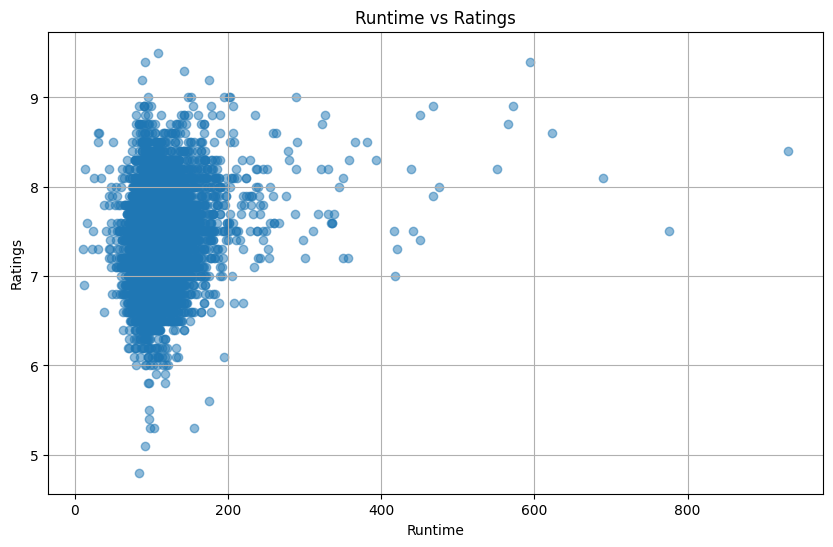

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(movies['Movie_Runtime'], movies['Movie_Rating'], alpha=0.5)
plt.title('Runtime vs Ratings')
plt.xlabel('Runtime')
plt.ylabel('Ratings')
plt.grid(True)
plt.show()

In [22]:
# Find the movie with the highest runtime
highest_runtime_movie = movies.loc[movies['Movie_Runtime'].idxmax()]
# Print relevant information
print("Movie Name:", highest_runtime_movie['Movie_Name'])
print("Gross Collection:", highest_runtime_movie['Gross_Collection'])
print("Rating:", highest_runtime_movie['Movie_Rating'])
print("Votes:", highest_runtime_movie['Movie_Votes'])


Movie Name: Berlin Alexanderplatz
Gross Collection: nan
Rating: 8.4
Votes: nan


* Gross collection-$263,274
* Genre -Drama/Crime  

### Stars And  Ratings

In [23]:
"""
**Calculating Average Movie Ratings by Stars**
* This script calculates the average movie ratings for each set of stars in the 'movies' DataFrame. 
* The result is sorted in descending order to identify stars with the highest average ratings.
"""

# Group by stars and calculate the mean rating for each star
average_rating_stars = movies.groupby('Movie_Stars')['Movie_Rating'].mean().sort_values(ascending=False)

# Get the top 10 stars with the highest average movie rating
top_10_stars = average_rating_stars.head(10)

# Display the information
print("Top 10 Stars with the Highest Average Movie Rating:",end="\n\n")
print(top_10_stars,end="\n\n")

Top 10 Stars with the Highest Average Movie Rating:

Movie_Stars
['Petar Kralj']                                                        9.50
['Serif Aljic', 'Zoran Radmilovic']                                    9.40
['Scott Grimes', 'Damian Lewis', 'Ron Livingston', 'Shane Taylor']     9.40
['Tim Robbins', 'Morgan Freeman', 'Bob Gunton', 'William Sadler']      9.30
['Kemal Sunal', 'Münir Özkul', 'Halit Akçatepe', 'Tarik Akan']         9.20
['Marlon Brando', 'Al Pacino', 'James Caan', 'Diane Keaton']           9.20
['Elijah Wood', 'Viggo Mortensen', 'Ian McKellen', 'Orlando Bloom']    9.00
['Christian Bale', 'Heath Ledger', 'Aaron Eckhart', 'Michael Caine']   9.00
['Henry Fonda', 'Lee J. Cobb', 'Martin Balsam', 'John Fiedler']        9.00
['Al Pacino', 'Robert De Niro', 'Robert Duvall', 'Diane Keaton']       9.00
Name: Movie_Rating, dtype: float64



### Data Visualization 

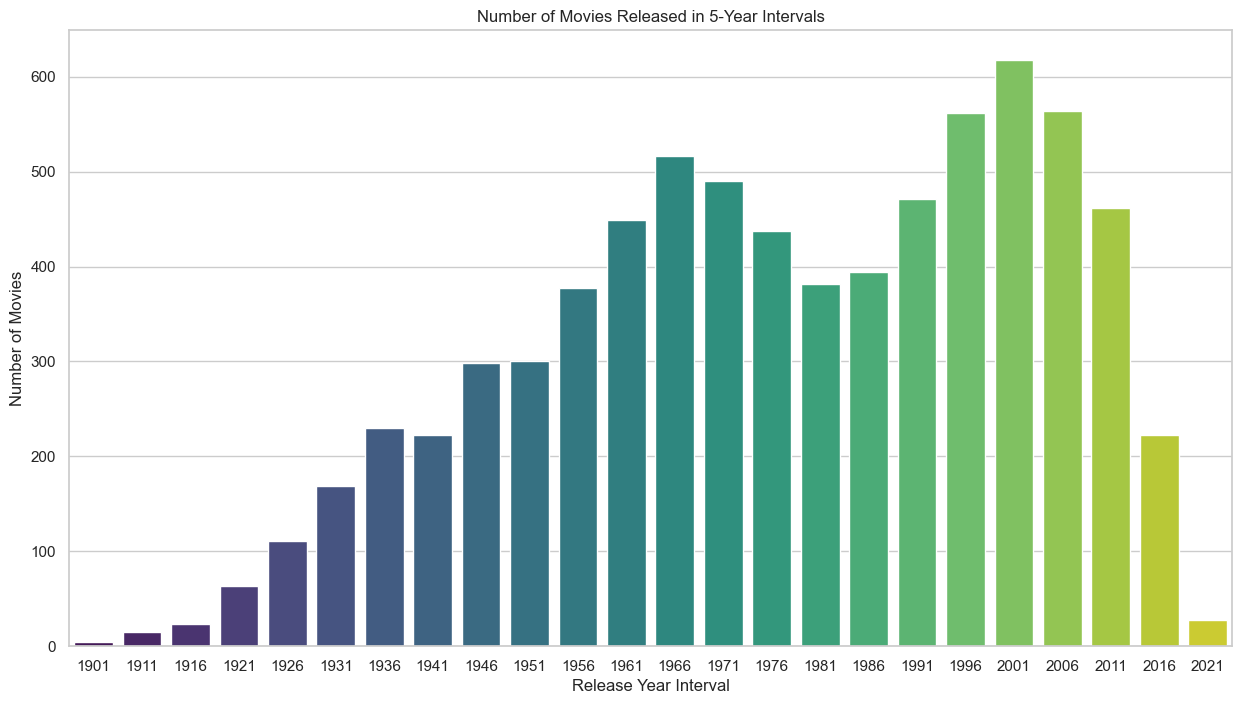

In [24]:
# Assuming 'movies' is your DataFrame with a column 'Year_of_Release'
# If not, replace it with your actual DataFrame

# Convert 'Year_of_Release' to integers
movies['Year_of_Release'] = pd.to_numeric(movies['Year_of_Release'], errors='coerce')

# Create 5-year intervals for grouping
interval = 5
movies['Release_Year_Grouped'] = ((movies['Year_of_Release'] - 1) // interval) * interval + 1

# Group by release year and count the number of movies for each 5-year interval
movies_per_interval = movies.groupby('Release_Year_Grouped')['Movie_Name'].count().reset_index()

# Set the plotting style
sns.set(style="whitegrid")

# Plot the number of movies released in 5-year intervals
plt.figure(figsize=(15, 8))
sns.barplot(x='Release_Year_Grouped', y='Movie_Name', data=movies_per_interval, palette="viridis")
plt.title('Number of Movies Released in 5-Year Intervals')
plt.xlabel('Release Year Interval')
plt.ylabel('Number of Movies')
plt.show()


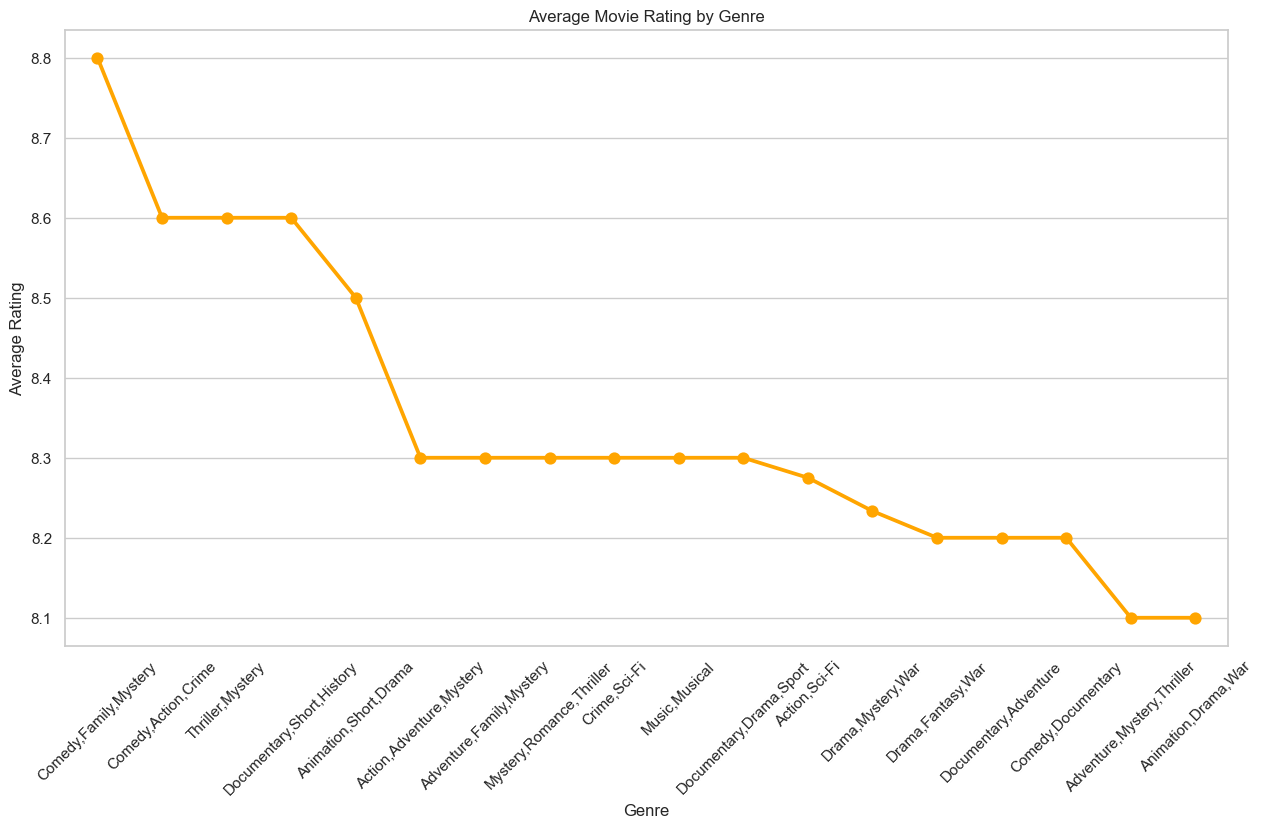

In [25]:
"""
**Visualizing Average Movie Ratings By Genre***
* This script utilizes the seaborn library to create a lLine plot for the distribution of movie ratings based on the 'movies' DataFrame. 
* The histogram provides insights into the spread of movie ratings.
"""

avg_rating_by_genre = movies.groupby('Genre')['Movie_Rating'].mean().sort_values(ascending=False).head(18)
plt.figure(figsize=(15, 8))
sns.pointplot(x=avg_rating_by_genre.index, y=avg_rating_by_genre, color='orange', markers='o', linestyles='-', capsize=0.1)
plt.title('Average Movie Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

In [26]:

print("Movie Ratings:")
print(movies['Movie_Rating'])

# Find the rating with the highest frequency
rating_counts = movies['Movie_Rating'].value_counts()

print("\nRatings Sorted by Frequency (Highest to Lowest):",end="\n\n")
print(rating_counts,end="\n\n")


# Assuming 'movies' is your DataFrame with a column 'Movie_Rating'
# If not, replace it with your actual DataFrame

# Print movie ratings sorted from highest to lowest
print("Movie Ratings from Highest to Lowest:",end="\n\n")
print(movies['Movie_Rating'].sort_values(ascending=False),end="\n\n")



Movie Ratings:
0      7.10
1      7.00
2      8.00
3      9.40
4      9.30
       ... 
7581   7.40
7582   6.60
7583   7.80
7584   7.80
7585   7.90
Name: Movie_Rating, Length: 7586, dtype: float64

Ratings Sorted by Frequency (Highest to Lowest):

Movie_Rating
7.50    770
7.30    665
7.40    653
7.60    643
7.20    634
7.10    607
7.00    513
7.70    490
7.80    395
6.90    339
7.90    271
8.00    248
8.10    220
6.80    214
6.70    177
8.20    134
6.60    118
8.30     91
6.50     83
8.40     52
8.50     49
6.40     47
8.60     31
8.70     24
6.20     22
6.30     18
6.10     17
8.80     14
8.90     12
6.00      9
9.00      7
5.80      3
5.30      3
9.40      2
5.90      2
9.20      2
9.30      1
5.60      1
5.50      1
5.10      1
5.40      1
4.80      1
9.50      1
Name: count, dtype: int64

Movie Ratings from Highest to Lowest:

6695   9.50
3      9.40
7212   9.40
4      9.30
3519   9.20
       ... 
6742   5.30
409    5.30
639    5.30
6046   5.10
6680   4.80
Name: Movie_Rating, Length

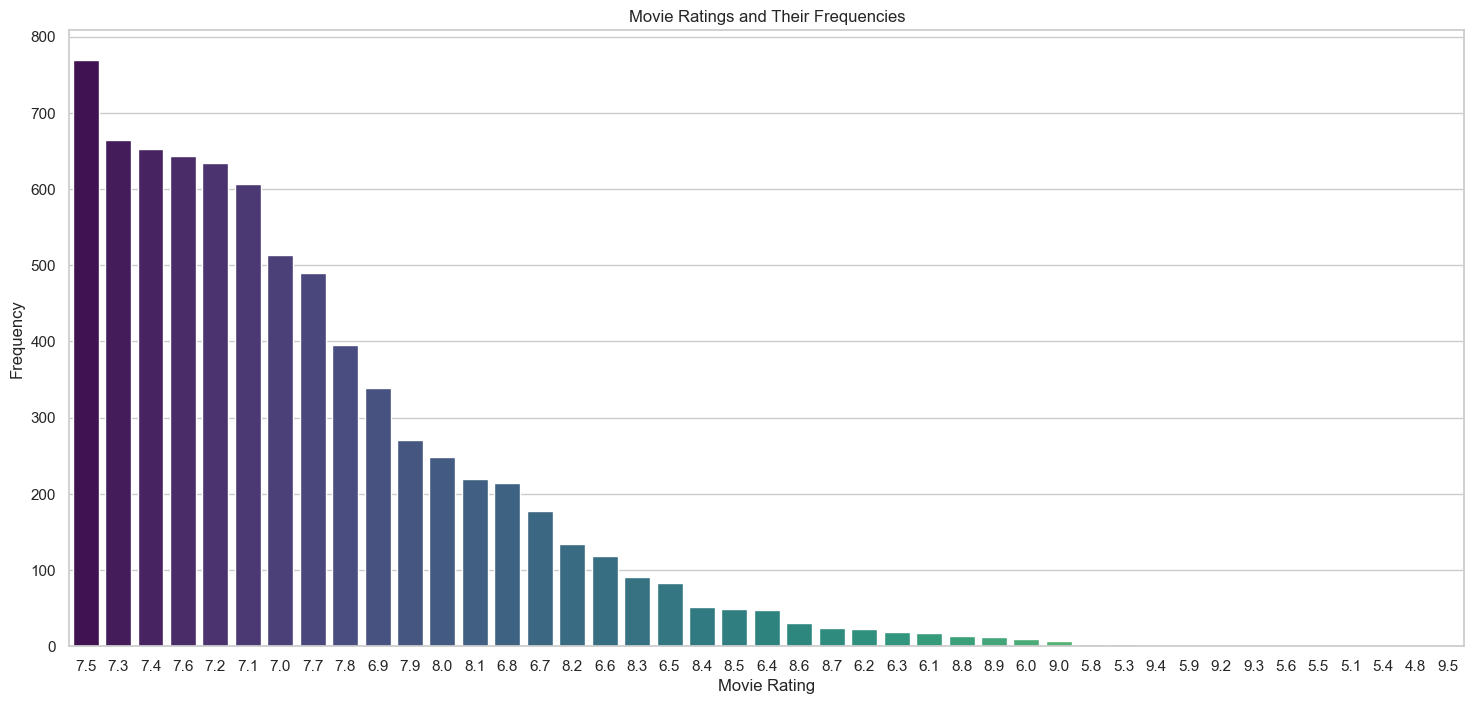

In [27]:
"""
**Visualizing Distribution of Movie Ratings**
* This script utilizes the seaborn library to create a histogram plot for the distribution of movie ratings based on the 'movies' DataFrame. 
* The histogram provides insights into the spread of movie ratings.
"""

sns.set(style="whitegrid")

# Create a bar plot of movie ratings and their frequencies
plt.figure(figsize=(18, 8))
sns.countplot(x='Movie_Rating', data=movies, order=movies['Movie_Rating'].value_counts().index, palette='viridis')
plt.title('Movie Ratings and Their Frequencies')
plt.xlabel('Movie Rating')
plt.ylabel('Frequency')
plt.show()

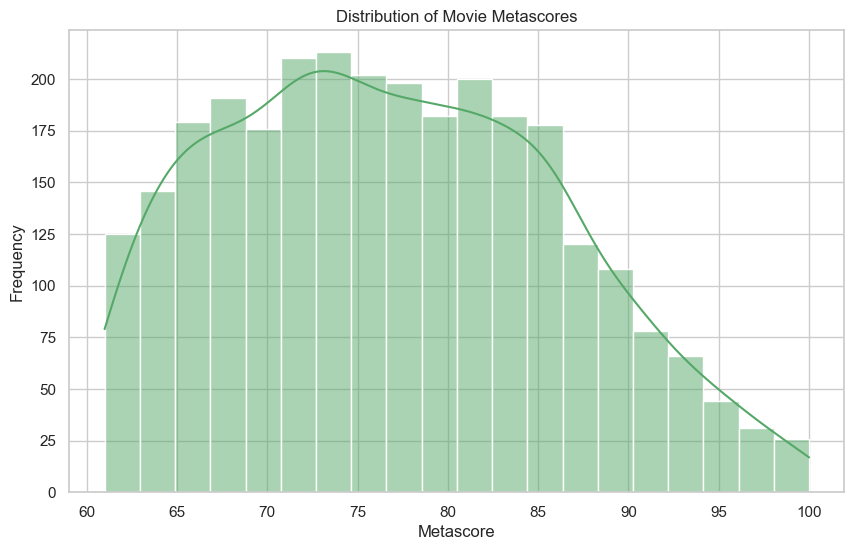

In [28]:
"""
**Visualizing Distribution of Movie Metascores**
* This script utilizes the seaborn library to create a histogram plot for the distribution of movie metascores based on the 'movies' DataFrame. 
* The histogram provides insights into the spread of metascores.
"""

plt.figure(figsize=(10, 6))
sns.histplot(movies['Movie_Metascore'], bins=20, kde=True, color='g')
plt.title('Distribution of Movie Metascores')
plt.xlabel('Metascore')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Top 20 Genres')

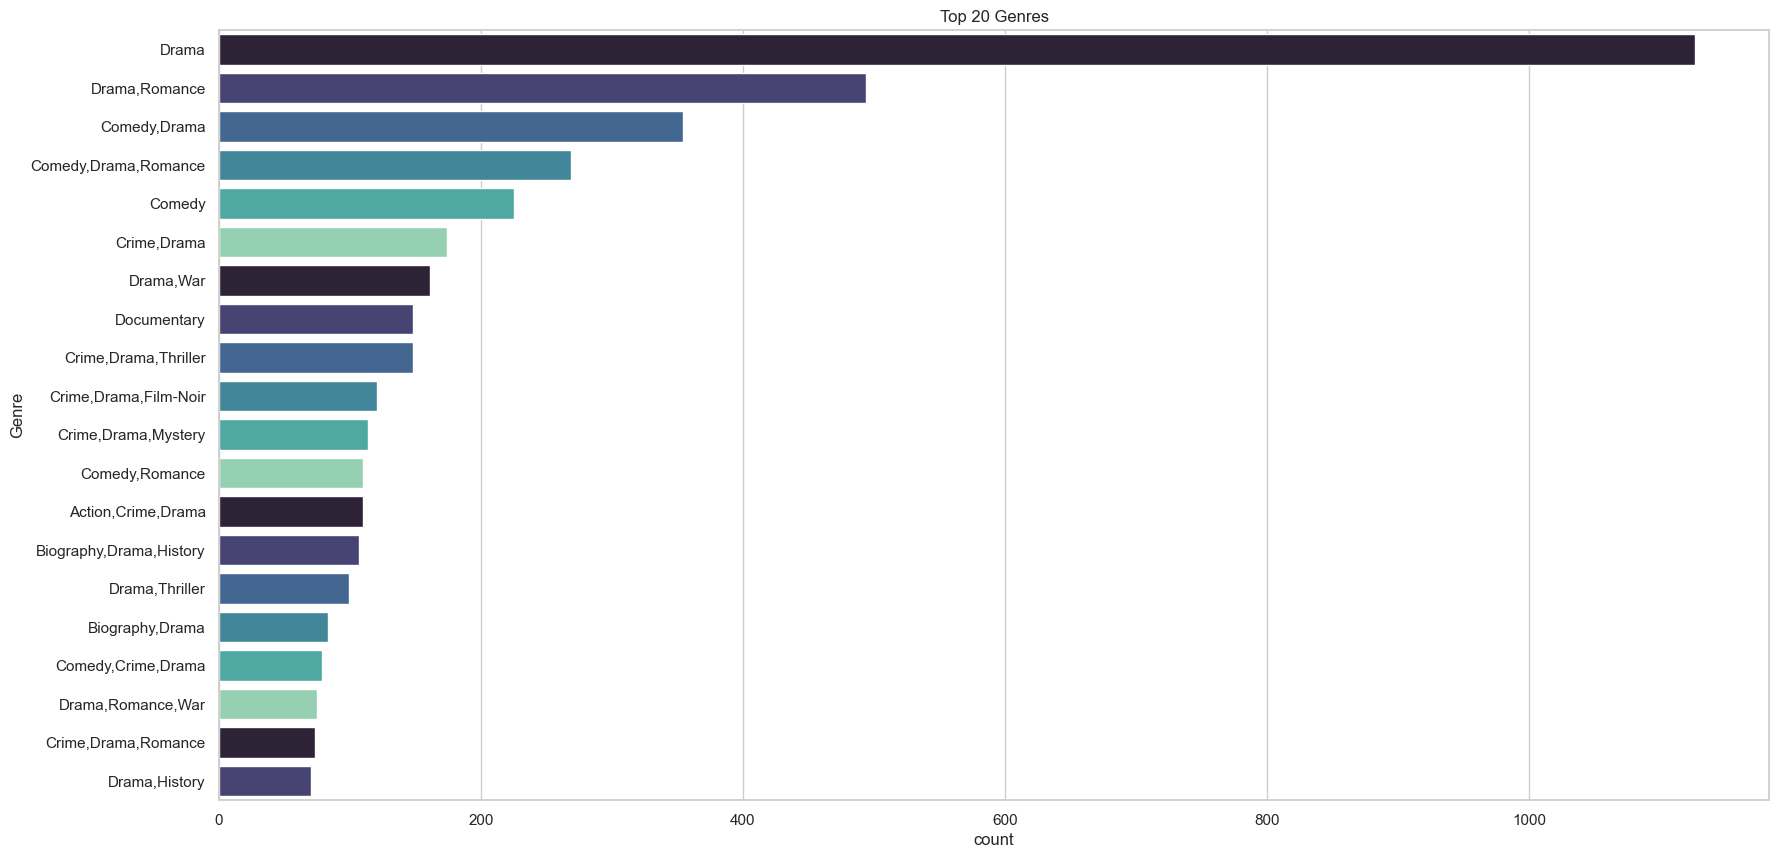

In [29]:
"""
**Visualizing Top 20 Genres Using Countplot**
* This script utilizes the seaborn library to create a countplot for the top 20 movie genres based on the 'movies' DataFrame. 
* The countplot represents the frequency distribution of genres.
"""

custom_palette = sns.color_palette('mako')
plt.figure(figsize=(20,10))
sns.countplot(y='Genre', data=movies, order=movies['Genre'].value_counts().index[:20],palette=custom_palette)
plt.title('Top 20 Genres')

Text(0.5, 1.0, 'Top 10 directors')

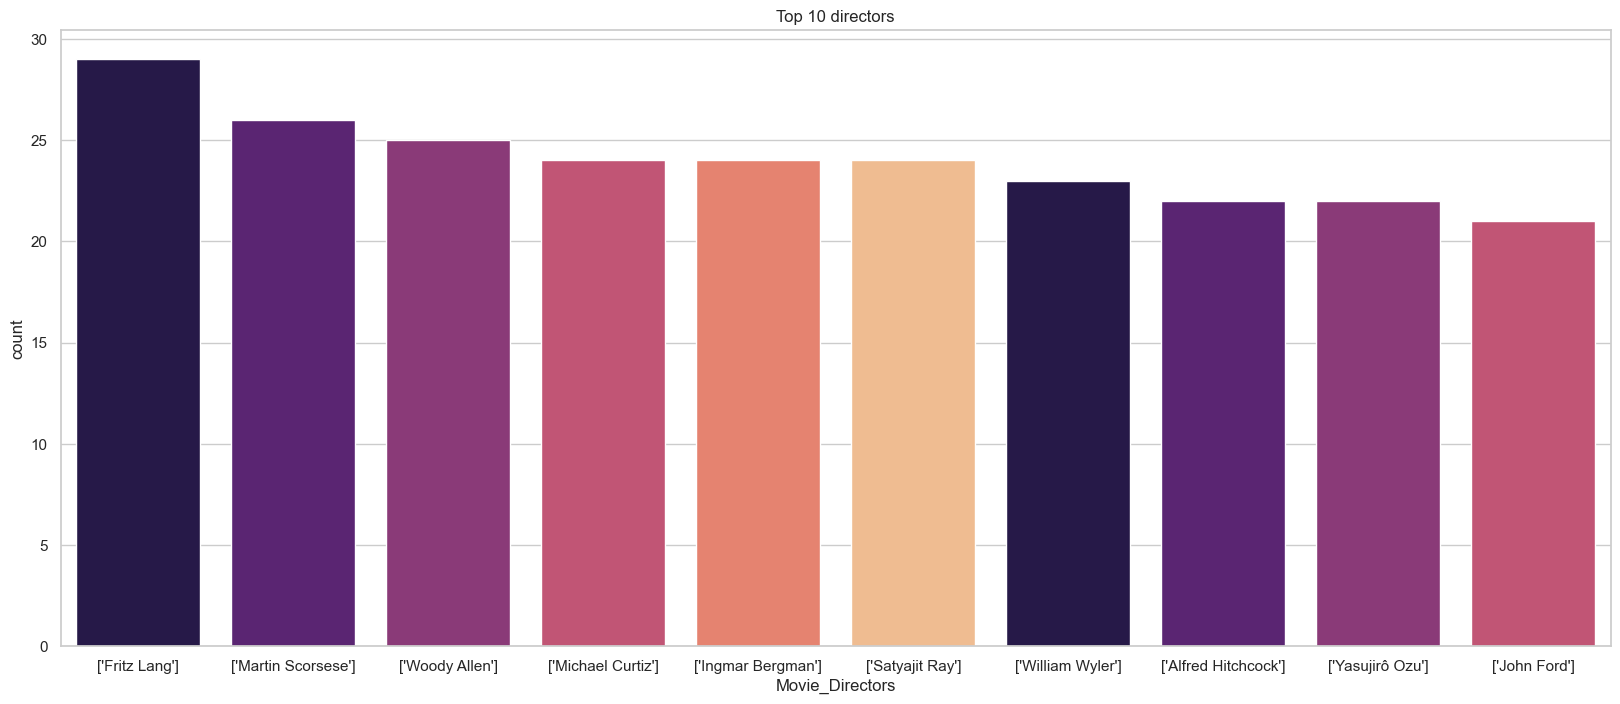

In [30]:
"""
**Visualizing Top 10 Directors Based on Movie Count**
* This script utilizes the seaborn library to create a countplot for the top 10 directors based on the number of movies in the 'movies' DataFrame. 
* The countplot represents the frequency distribution of movies directed by each director.
"""

custom_palette = sns.color_palette('magma')
plt.figure(figsize=(20,8))
sns.countplot(x='Movie_Directors', data=movies, order=movies['Movie_Directors'].value_counts().index[:10],palette=custom_palette)
plt.title('Top 10 directors')

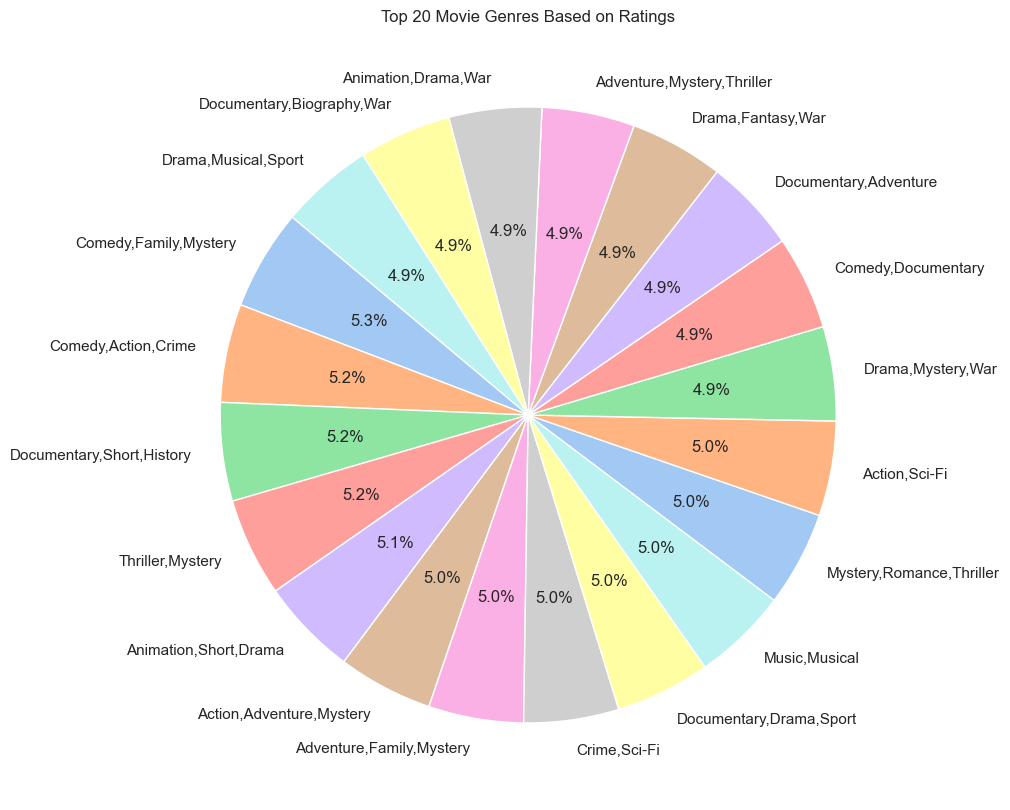

In [31]:
"""
**Visualizing Top20 Genre Based on Movie Ratings**
* This script utilizes the MatplotLib library to create a pie chart for the top 20 Genre based on the Movie Ratings in the 'movies' DataFrame. 
* The Pie Chart represents the top 20 Genre based on the Movie Ratings .
"""

genre_ratings = movies.groupby('Genre')['Movie_Rating'].mean()
# Get the top 20 genres based on ratings
top_genres = genre_ratings.nlargest(20)
# Plotting the pie chart
plt.figure(figsize=(10, 10))
plt.pie(top_genres, labels=top_genres.index, autopct='%1.1f%%', startangle=140,colors=sns.color_palette('pastel') )
plt.title('Top 20 Movie Genres Based on Ratings')
plt.show()


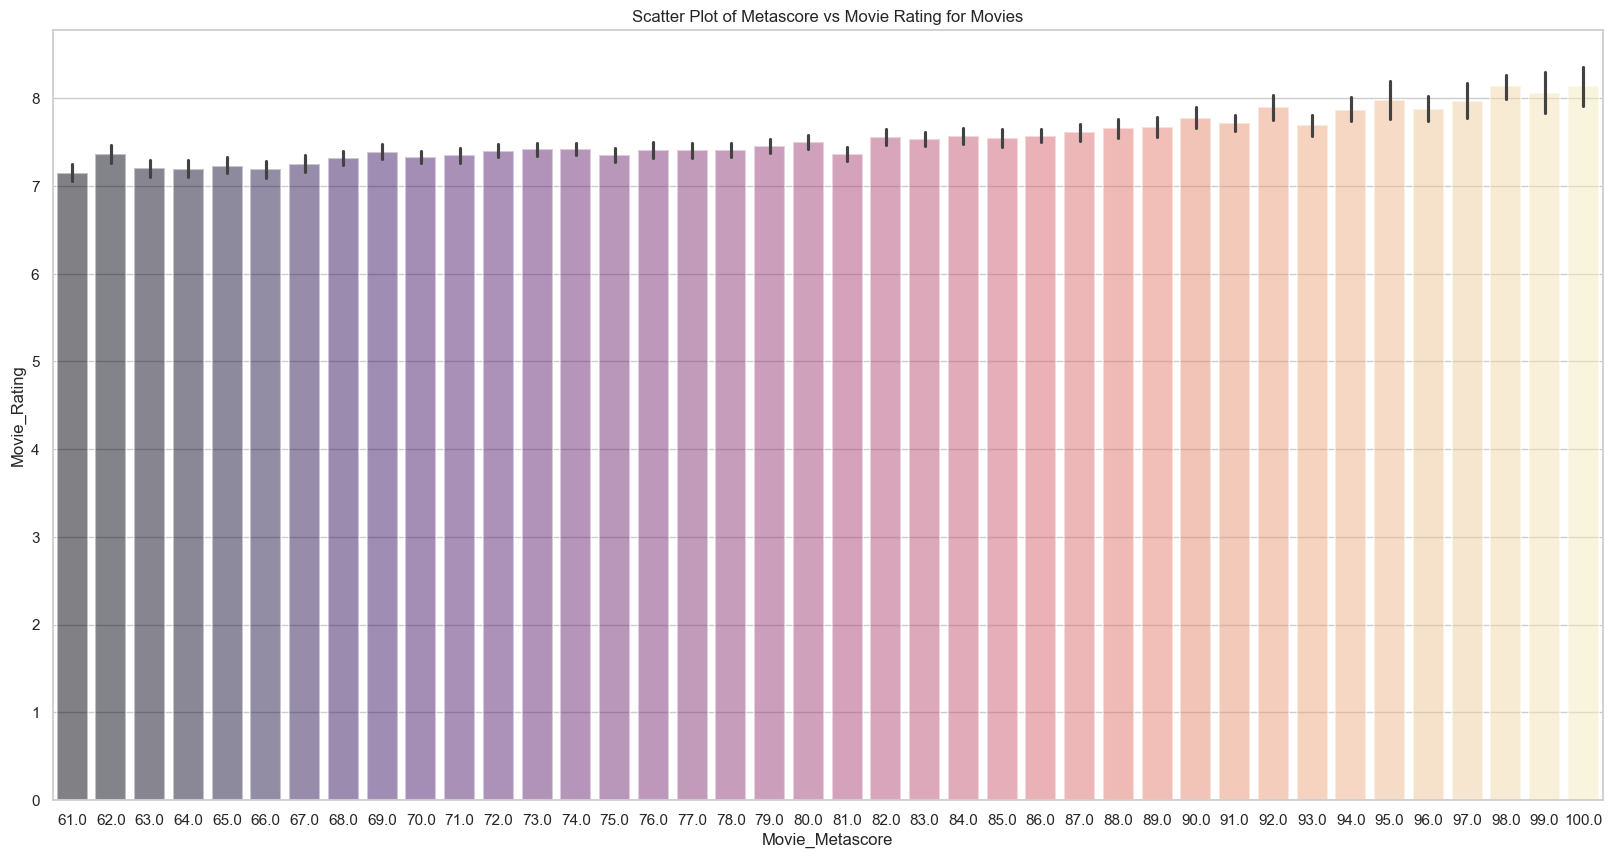

In [32]:
"""
***Visualizing Compering for MeatScore and Ratings***
* This script utilizes the seaborn library to create a barplot fro comparing Metascore and Ratings of  "Movies' DataFrame.
* This Barplot represents comparison between MetaSocre and Ratings.
line chart
"""

#Convert 'Movie_Metascore' to numeric type
movies['Movie_Metascore'] = pd.to_numeric(movies['Movie_Metascore'], errors='coerce')
top_movies = movies.nlargest(7586, 'Movie_Metascore')
#scatter plot
plt.figure(figsize=(20, 10))
sns.barplot(x='Movie_Metascore', y='Movie_Rating', fill=True, alpha=0.5, linewidth=1.5, palette='magma',data=top_movies)
plt.title('Scatter Plot of Metascore vs Movie Rating for Movies')
plt.show()

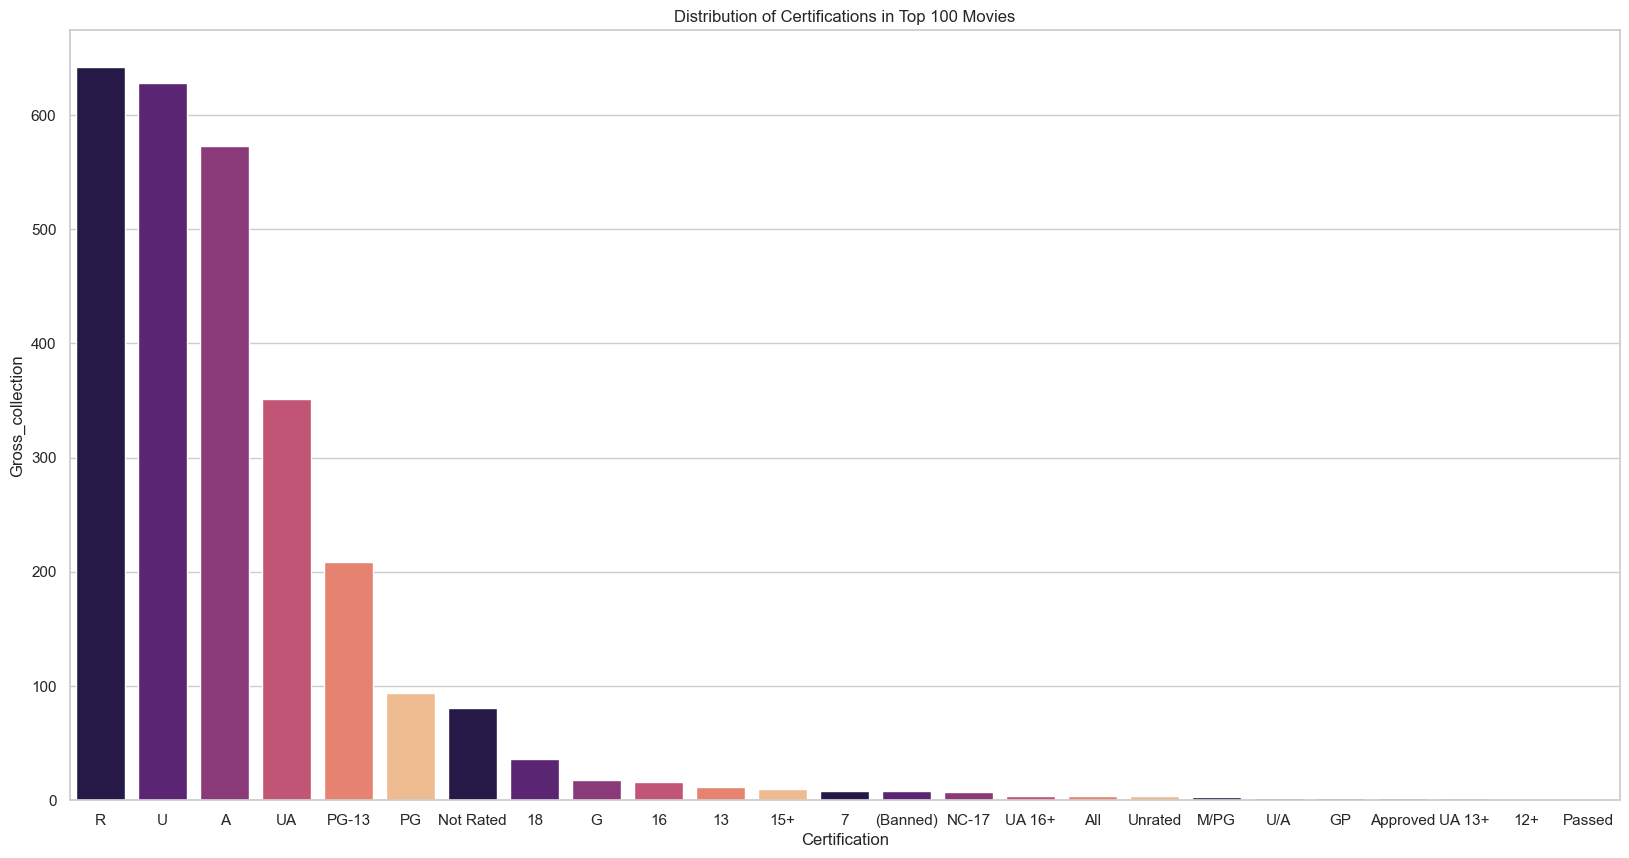

In [33]:
"""
***Visualizing Compering for Crrtification and Gross Collection ***
* This script utilizes the seaborn library to create a countplot fro comparing Cretificates and Gross Collection of 'Movie' DataFrame.
* This Countplot represents comparison between  Cretificates and Gross Collection.
"""

# Assuming 'Gross_Collection' column contains numeric values stored as strings
movies['Gross_Collection'] = pd.to_numeric(movies['Gross_Collection'], errors='coerce')
# Now, you can use nlargest on the numeric column
topmovies = movies.nlargest(7586, 'Gross_Collection')
# Continue with your plot or analysis
custom_palette = sns.color_palette('magma')
plt.figure(figsize=(20, 10))
sns.countplot(x='Certification', data=topmovies, order=topmovies['Certification'].value_counts().index,palette=custom_palette)
plt.title('Distribution of Certifications in Top 100 Movies')
plt.xlabel('Certification')
plt.ylabel('Gross_collection')
plt.show()

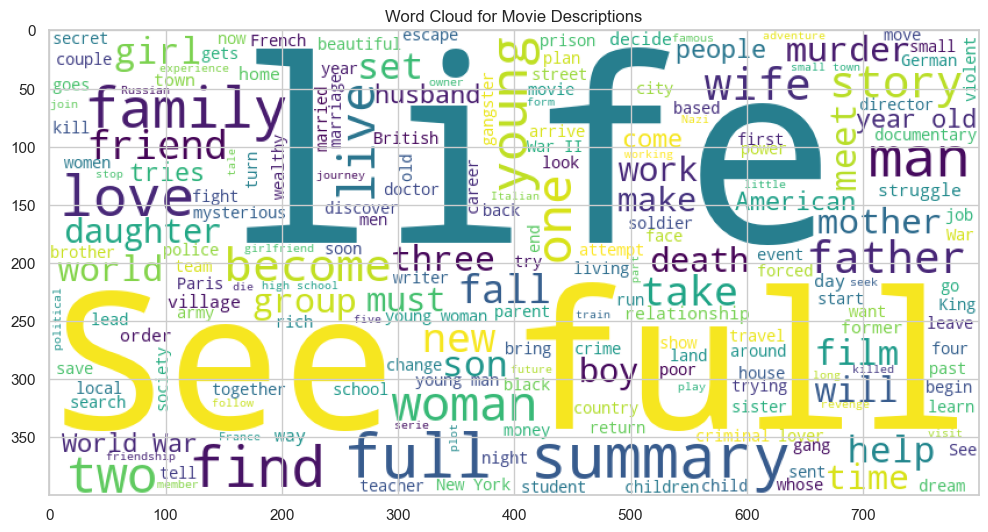

In [34]:
"""
**Creating Word Cloud for Movie Descriptions**
* This script utilizes the WordCloud library to create a word cloud for movie descriptions based on the 'Movie_Description' column in the 'movies' DataFrame. 
* The word cloud visually represents the most frequent words in the movie descriptions.
"""

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(movies['Movie_Description']))

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.title('Word Cloud for Movie Descriptions')
plt.show()

## Creating a Subset DataFrame with Selected Columns For Model Building Analysis On Categorical Data

In [35]:
"""
**Creating a Subset DataFrame with Selected Columns**
* This function extracts specific columns from the 'movies' DataFrame to create a new DataFrame 'cate_movies_df'. 
* The selected columns include "Movie_Name," "Genre," "Certification," "Movie_Description," "Movie_Stars," and "Movie_Directors."
Parameters:
- movies (pd.DataFrame): The original DataFrame containing movie data.
Returns:
-pd.DataFrame: A new DataFrame ('cate_movies_df') with the selected columns.
"""

cate_movies_df = movies[["Movie_id","Movie_Name", "Genre", "Certification", "Movie_Description", "Movie_Stars", "Movie_Directors"]]

In [36]:
cate_movies_df.head()

,Movie_id,Movie_Name,Genre,Certification,Movie_Description,Movie_Stars,Movie_Directors
0,tt0377092,Mean Girls,Comedy,A,"Cady Heron is a hit with The Plastics, the A-l...","['Lindsay Lohan', 'Jonathan Bennett', 'Rachel ...",['Mark Waters']
1,tt5715874,The Killing of a Sacred Deer,"Drama,Horror,Mystery",18,"Steven, a charismatic surgeon, is forced to ma...","['Barry G. Bernson', 'Herb Caillouet', 'Bill C...",['Yorgos Lanthimos']
2,tt1160419,Dune: Part One,"Action,Adventure,Drama",UA,A noble family becomes embroiled in a war for ...,"['Timothée Chalamet', 'Rebecca Ferguson', 'Zen...",['Denis Villeneuve']
3,tt0185906,Band of Brothers,"Drama,History,War",U,The story of Easy Company of the U.S. Army 101...,"['Scott Grimes', 'Damian Lewis', 'Ron Livingst...",NaN
4,tt0111161,The Shawshank Redemption,Drama,A,"Over the course of several years, two convicts...","['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",['Frank Darabont']


In [37]:
cate_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7586 entries, 0 to 7585
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Movie_id           7586 non-null   object
 1   Movie_Name         7586 non-null   object
 2   Genre              7585 non-null   object
 3   Certification      2718 non-null   object
 4   Movie_Description  7586 non-null   object
 5   Movie_Stars        7564 non-null   object
 6   Movie_Directors    7566 non-null   object
dtypes: object(7)
memory usage: 415.0+ KB


In [38]:
#To chaeck NAN values
cate_movies_df.isna().sum()

Movie_id                0
Movie_Name              0
Genre                   1
Certification        4868
Movie_Description       0
Movie_Stars            22
Movie_Directors        20
dtype: int64

In [39]:
cate_movies_df.describe(include="all").T

,count,unique,top,freq
Movie_id,7586,7586,tt0377092,1
Movie_Name,7586,7468,Little Women,3
Genre,7585,497,Drama,1127
Certification,2718,25,R,642
Movie_Description,7586,7582,Add a Plot,4
Movie_Stars,7564,7548,"['William Shatner', 'Leonard Nimoy', 'DeForest...",3
Movie_Directors,7566,3396,['Fritz Lang'],29


### Removing '[ ]' From Movie_Stars and Movie_Directors Columns

In [40]:
"""
**Cleaning Movie_Stars and Movie_Directors Columns**

This script snippet cleans the 'Movie_Stars' and 'Movie_Directors' columns in the 'cate_movies_df' DataFrame by removing square brackets and single quotes.

Parameters:
- cate_movies_df (pd.DataFrame): The DataFrame containing movie data with selected columns.

Usage:
1. Ensure that the 'cate_movies_df' DataFrame is loaded.

Note: Adjust column names and DataFrame variables based on the actual structure of your data.


cate_movies_df["Movie_Stars"] = cate_movies_df.Movie_Stars.str.replace('\[|\]|\'', '')
cate_movies_df["Movie_Directors"] = cate_movies_df.Movie_Directors.str.replace('\[|\]|\'', '')
"""

'\n**Cleaning Movie_Stars and Movie_Directors Columns**\n\nThis script snippet cleans the \'Movie_Stars\' and \'Movie_Directors\' columns in the \'cate_movies_df\' DataFrame by removing square brackets and single quotes.\n\nParameters:\n- cate_movies_df (pd.DataFrame): The DataFrame containing movie data with selected columns.\n\nUsage:\n1. Ensure that the \'cate_movies_df\' DataFrame is loaded.\n\nNote: Adjust column names and DataFrame variables based on the actual structure of your data.\n\n\ncate_movies_df["Movie_Stars"] = cate_movies_df.Movie_Stars.str.replace(\'\\[|\\]|\'\', \'\')\ncate_movies_df["Movie_Directors"] = cate_movies_df.Movie_Directors.str.replace(\'\\[|\\]|\'\', \'\')\n'

### Splitting Columns with Comma-Separated Values

In [41]:
#cate_movies_df["Certification"].fillna(cate_movies_df["Certification"].mode()[0], inplace= True)
cate_movies_df = cate_movies_df.dropna()

In [42]:
cate_movies_df.describe(include="all").T

,count,unique,top,freq
Movie_id,2717,2717,tt0377092,1
Movie_Name,2717,2691,Innocence,3
Genre,2717,317,Drama,252
Certification,2717,25,R,642
Movie_Description,2717,2716,Superman agrees to sacrifice his powers to sta...,2
Movie_Stars,2717,2710,"['William Shatner', 'Leonard Nimoy', 'DeForest...",3
Movie_Directors,2717,1432,['Martin Scorsese'],22


In [43]:
"""
**Splitting Columns with Comma-Separated Values**

This script snippet splits specific columns in the 'cate_movies_df' DataFrame, which contain comma-separated values, into lists.

Parameters:
- cate_movies_df (pd.DataFrame): The DataFrame containing movie data with selected columns.

Usage:
1. Ensure that the 'cate_movies_df' DataFrame is loaded.

Note: Adjust column names and DataFrame variables based on the actual structure of your data.
"""

cate_movies_df['Genre'] = cate_movies_df['Genre'].apply(lambda x:x.split(','))
cate_movies_df['Certification'] = cate_movies_df['Certification'].apply(lambda x:x.split(','))
cate_movies_df['Movie_Stars'] = cate_movies_df['Movie_Stars'].apply(lambda x:x.split(','))
cate_movies_df['Movie_Description'] = cate_movies_df['Movie_Description'].apply(lambda x:x.split())
cate_movies_df['Movie_Directors'] = cate_movies_df['Movie_Directors'].apply(lambda x:x.split(','))

In [44]:
"""
**Collapsing Whitespace in List Elements**

This function takes a list as input and removes extra whitespace from each element in the list by collapsing consecutive spaces into a single space.

Parameters:
- L (list): Input list containing elements with potential extra whitespace.

Returns:
list: A new list with elements having collapsed whitespace.

Usage Example:
```python
cleaned_list = collapse(input_list)
"""

def collapse(L):
    L1 = []
    for i in L:
        L1.append(i.replace(" ",""))
    return L1

In [45]:
"""
**Removing Blank Spaces from List Elements**

This script snippet applies the 'collapse' function to specific columns in the 'cate_movies_df' DataFrame to remove blank spaces from each element in the lists.

Parameters:
- cate_movies_df (pd.DataFrame): The DataFrame containing movie data with selected columns.

Usage:
1. Ensure that the 'cate_movies_df' DataFrame is loaded.

Note: Adjust column names and DataFrame variables based on the actual structure of your data.
"""

cate_movies_df['Genre'] = cate_movies_df['Genre'].apply(collapse)
cate_movies_df['Movie_Stars'] = cate_movies_df['Movie_Stars'].apply(collapse)
cate_movies_df['Movie_Directors'] = cate_movies_df['Movie_Directors'].apply(collapse)

In [46]:
cate_movies_df.head()

,Movie_id,Movie_Name,Genre,Certification,Movie_Description,Movie_Stars,Movie_Directors
0,tt0377092,Mean Girls,[Comedy],[A],"[Cady, Heron, is, a, hit, with, The, Plastics,...","[['LindsayLohan', 'JonathanBennett', 'RachelMc...",[['MarkWaters']]
1,tt5715874,The Killing of a Sacred Deer,"[Drama, Horror, Mystery]",[18],"[Steven,, a, charismatic, surgeon,, is, forced...","[['BarryG.Bernson', 'HerbCaillouet', 'BillCamp...",[['YorgosLanthimos']]
2,tt1160419,Dune: Part One,"[Action, Adventure, Drama]",[UA],"[A, noble, family, becomes, embroiled, in, a, ...","[['TimothéeChalamet', 'RebeccaFerguson', 'Zend...",[['DenisVilleneuve']]
4,tt0111161,The Shawshank Redemption,[Drama],[A],"[Over, the, course, of, several, years,, two, ...","[['TimRobbins', 'MorganFreeman', 'BobGunton', ...",[['FrankDarabont']]
5,tt0816692,Interstellar,"[Adventure, Drama, Sci-Fi]",[UA],"[When, Earth, becomes, uninhabitable, in, the,...","[['MatthewMcConaughey', 'AnneHathaway', 'Jessi...",[['ChristopherNolan']]


In [47]:
"""
**Creating a Combined 'tags' Column**

This script snippet combines multiple columns in the 'cate_movies_df' DataFrame into a single 'tags' column. The selected columns include 'Genre,' 'Certification,' 'Movie_Description,' 'Movie_Stars,' and 'Movie_Directors.'

Parameters:
- cate_movies_df (pd.DataFrame): The DataFrame containing movie data with selected columns.

Usage:
1. Ensure that the 'cate_movies_df' DataFrame is loaded.
2. Uncomment the code to create the 'tags' column.

Note: Adjust column names and DataFrame variables based on the actual structure of your data.
"""

cate_movies_df['tags'] = cate_movies_df['Genre'] + cate_movies_df['Certification'] + cate_movies_df['Movie_Description'] + cate_movies_df['Movie_Stars'] + cate_movies_df['Movie_Directors']

In [48]:
cate_movies_df.head()

,Movie_id,Movie_Name,Genre,Certification,Movie_Description,Movie_Stars,Movie_Directors,tags
0,tt0377092,Mean Girls,[Comedy],[A],"[Cady, Heron, is, a, hit, with, The, Plastics,...","[['LindsayLohan', 'JonathanBennett', 'RachelMc...",[['MarkWaters']],"[Comedy, A, Cady, Heron, is, a, hit, with, The..."
1,tt5715874,The Killing of a Sacred Deer,"[Drama, Horror, Mystery]",[18],"[Steven,, a, charismatic, surgeon,, is, forced...","[['BarryG.Bernson', 'HerbCaillouet', 'BillCamp...",[['YorgosLanthimos']],"[Drama, Horror, Mystery, 18, Steven,, a, chari..."
2,tt1160419,Dune: Part One,"[Action, Adventure, Drama]",[UA],"[A, noble, family, becomes, embroiled, in, a, ...","[['TimothéeChalamet', 'RebeccaFerguson', 'Zend...",[['DenisVilleneuve']],"[Action, Adventure, Drama, UA, A, noble, famil..."
4,tt0111161,The Shawshank Redemption,[Drama],[A],"[Over, the, course, of, several, years,, two, ...","[['TimRobbins', 'MorganFreeman', 'BobGunton', ...",[['FrankDarabont']],"[Drama, A, Over, the, course, of, several, yea..."
5,tt0816692,Interstellar,"[Adventure, Drama, Sci-Fi]",[UA],"[When, Earth, becomes, uninhabitable, in, the,...","[['MatthewMcConaughey', 'AnneHathaway', 'Jessi...",[['ChristopherNolan']],"[Adventure, Drama, Sci-Fi, UA, When, Earth, be..."


### Creating an Updated DataFrame For Model Building Which Has Only Two Features Movie_Name & Tags

In [49]:
"""
**Creating an Updated DataFrame**

This script snippet creates a new DataFrame 'updated_movies_df' by dropping specific columns from the 'cate_movies_df' DataFrame. The columns removed include 'Genre,' 'Certification,' 'Movie_Description,' 'Movie_Stars,' and 'Movie_Directors.'

Parameters:
- cate_movies_df (pd.DataFrame): The original DataFrame containing movie data with selected columns.

Returns:
pd.DataFrame: A new DataFrame ('updated_movies_df') without the specified columns.

Usage:
1. Ensure that the 'cate_movies_df' DataFrame is loaded.
2. Uncomment the code to create the 'updated_movies_df' DataFrame.

Note: Adjust column names and DataFrame variables based on the actual structure of your data.
"""

updated_movies_df = cate_movies_df.drop(columns=['Genre','Certification','Movie_Description','Movie_Stars','Movie_Directors'])

In [50]:
updated_movies_df.head()

,Movie_id,Movie_Name,tags
0,tt0377092,Mean Girls,"[Comedy, A, Cady, Heron, is, a, hit, with, The..."
1,tt5715874,The Killing of a Sacred Deer,"[Drama, Horror, Mystery, 18, Steven,, a, chari..."
2,tt1160419,Dune: Part One,"[Action, Adventure, Drama, UA, A, noble, famil..."
4,tt0111161,The Shawshank Redemption,"[Drama, A, Over, the, course, of, several, yea..."
5,tt0816692,Interstellar,"[Adventure, Drama, Sci-Fi, UA, When, Earth, be..."


In [51]:
updated_movies_df['tags'] = updated_movies_df['tags'].apply(lambda x: " ".join(x))
updated_movies_df.head()

,Movie_id,Movie_Name,tags
0,tt0377092,Mean Girls,Comedy A Cady Heron is a hit with The Plastics...
1,tt5715874,The Killing of a Sacred Deer,"Drama Horror Mystery 18 Steven, a charismatic ..."
2,tt1160419,Dune: Part One,Action Adventure Drama UA A noble family becom...
4,tt0111161,The Shawshank Redemption,"Drama A Over the course of several years, two ..."
5,tt0816692,Interstellar,Adventure Drama Sci-Fi UA When Earth becomes u...


In [52]:
updated_movies_df['tags'][1]

"Drama Horror Mystery 18 Steven, a charismatic surgeon, is forced to make an unthinkable sacrifice after his life starts to fall apart, when the behavior of a teenage boy he has taken under his wing turns sinister. ['BarryG.Bernson' 'HerbCaillouet' 'BillCamp' 'RaffeyCassidy'] ['YorgosLanthimos']"

### Model Building
#### Creating a Count Vectorizer for Movie Tags

In [53]:
"""
**Creating a Count Vectorizer for Movie Tags**

This script snippet uses the CountVectorizer from scikit-learn to convert the 'tags' column in the 'updated_movies_df' DataFrame into a matrix of token counts.

Parameters:
- updated_movies_df (pd.DataFrame): The DataFrame containing movie data with the 'tags' column.

Returns:
scipy.sparse.csr.csr_matrix: A sparse matrix representing the token counts of words in the 'tags' column.

Usage:
1. Ensure that the 'updated_movies_df' DataFrame is loaded.

Note: Adjust column names and DataFrame variables based on the actual structure of your data.
"""
cv = CountVectorizer(max_features=7500,stop_words='english')
count_vector = cv.fit_transform(updated_movies_df['tags'])
 

In [54]:
count_vector.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [55]:
count_vector.shape

(2717, 7500)

In [56]:
pd.DataFrame(count_vector.toarray())

,0,1,2,3,4,5,6,7,8,9,...,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2712,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2713,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2714,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2715,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
cv.vocabulary_

{'comedy': 1266,
 'hit': 2795,
 'list': 3766,
 'girl': 2529,
 'new': 4456,
 'school': 5867,
 'makes': 3917,
 'mistake': 4260,
 'falling': 2198,
 'ex': 2115,
 'boyfriend': 788,
 'alpha': 302,
 'plastic': 5135,
 'regina': 5479,
 'george': 2491,
 'lindsaylohan': 3755,
 'rachelmcadams': 5351,
 'drama': 1838,
 'horror': 2840,
 'mystery': 4365,
 '18': 13,
 'charismatic': 1058,
 'surgeon': 6501,
 'forced': 2334,
 'make': 3915,
 'unthinkable': 6994,
 'sacrifice': 5791,
 'life': 3738,
 'starts': 6343,
 'fall': 2196,
 'apart': 422,
 'behavior': 630,
 'teenage': 6634,
 'boy': 787,
 'taken': 6592,
 'wing': 7375,
 'turns': 6911,
 'sinister': 6140,
 'yorgoslanthimos': 7461,
 'action': 137,
 'adventure': 182,
 'ua': 6927,
 'family': 2205,
 'embroiled': 1977,
 'war': 7208,
 'control': 1358,
 'galaxy': 2443,
 'valuable': 7026,
 'heir': 2742,
 'troubled': 6885,
 'visions': 7117,
 'dark': 1532,
 'future': 2430,
 'timothéechalamet': 6751,
 'rebeccaferguson': 5433,
 'zendaya': 7488,
 'oscarisaac': 4675,
 '

In [58]:
count_vector_df = pd.DataFrame(count_vector.toarray())

In [59]:
count_vector_df

,0,1,2,3,4,5,6,7,8,9,...,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2712,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2713,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2714,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2715,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Calculating Cosine Similarity

In [60]:
"""
**Calculating Cosine Similarity**

This script snippet calculates the cosine similarity matrix for the vectorized 'tags' column using the previously created Count Vectorizer.

Parameters:
- vector (scipy.sparse.csr.csr_matrix): Sparse matrix representing the token counts of words in the 'tags' column.

Returns:
numpy.ndarray: Cosine similarity matrix.

Usage:
1. Ensure that the 'vector' matrix is generated from the Count Vectorizer.

Note: Adjust variable names based on the actual structure of your data.
"""

similarity = cosine_similarity(count_vector_df)

In [61]:
similarity = pd.DataFrame(similarity)
similarity

,0,1,2,3,4,5,6,7,8,9,...,2707,2708,2709,2710,2711,2712,2713,2714,2715,2716
0,1.00,0.00,0.00,0.00,0.10,0.00,0.00,0.05,0.00,0.00,...,0.06,0.00,0.05,0.05,0.00,0.13,0.05,0.04,0.00,0.00
1,0.00,1.00,0.05,0.06,0.04,0.04,0.11,0.09,0.05,0.04,...,0.11,0.05,0.04,0.04,0.04,0.12,0.05,0.00,0.00,0.07
2,0.00,0.05,1.00,0.06,0.18,0.09,0.11,0.00,0.20,0.13,...,0.06,0.10,0.04,0.04,0.05,0.12,0.05,0.00,0.10,0.07
3,0.00,0.06,0.06,1.00,0.05,0.05,0.07,0.00,0.06,0.05,...,0.07,0.12,0.11,0.05,0.05,0.07,0.06,0.05,0.00,0.08
4,0.10,0.04,0.18,0.05,1.00,0.04,0.05,0.04,0.13,0.12,...,0.10,0.09,0.08,0.04,0.04,0.05,0.04,0.00,0.00,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2712,0.13,0.12,0.12,0.07,0.05,0.11,0.07,0.11,0.06,0.05,...,0.15,0.06,0.06,0.11,0.17,1.00,0.12,0.05,0.00,0.26
2713,0.05,0.05,0.05,0.06,0.04,0.04,0.05,0.00,0.05,0.04,...,0.06,0.05,0.04,0.04,0.04,0.12,1.00,0.00,0.00,0.07
2714,0.04,0.00,0.00,0.05,0.00,0.00,0.00,0.04,0.00,0.00,...,0.00,0.08,0.04,0.07,0.11,0.05,0.00,1.00,0.12,0.11
2715,0.00,0.00,0.10,0.00,0.00,0.00,0.11,0.00,0.05,0.00,...,0.00,0.10,0.00,0.00,0.13,0.00,0.00,0.12,1.00,0.07


### Movie Recommendation Function

In [62]:
"""
**Movie Recommendation Function**

This script snippet defines a function named 'recommend' that takes a movie name as input and recommends similar movies based on cosine similarity.

Parameters:
- movie (str): The name of the movie for which recommendations are sought.

Usage:
1. Ensure that the 'recommend' function is defined.
2. Call the function with a movie name as an argument to get recommendations.

Note: Adjust variable names based on the actual structure of your data.
"""

def recommend(movie):
    index = updated_movies_df[updated_movies_df['Movie_Name'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:11]:
        print(updated_movies_df.iloc[i[0]].Movie_Name)
        

        
        

In [63]:
recommend('Die Hard')

Star Wars: Episode V - The Empire Strikes Back
Star Wars: Episode VI - Return of the Jedi
The NeverEnding Story
Spaceballs
The Incredibles
Hellboy
Wonder Woman
Wo hu cang long
Batoru rowaiaru
DragonHeart


### TFIDF-Vectorization

In [64]:
tf = TfidfVectorizer()

data = tf.fit_transform(updated_movies_df['tags'])
data.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [65]:
tf.vocabulary_

{'comedy': 3354,
 'cady': 2487,
 'heron': 7144,
 'is': 7904,
 'hit': 7222,
 'with': 17834,
 'the': 16384,
 'plastics': 12872,
 'list': 9855,
 'girl': 6472,
 'clique': 3237,
 'at': 1382,
 'her': 7114,
 'new': 11700,
 'school': 14708,
 'until': 17155,
 'she': 15043,
 'makes': 10228,
 'mistake': 11196,
 'of': 11988,
 'falling': 5630,
 'for': 5929,
 'aaron': 206,
 'samuels': 14572,
 'ex': 5475,
 'boyfriend': 2177,
 'alpha': 761,
 'plastic': 12871,
 'regina': 13666,
 'george': 6351,
 'lindsaylohan': 9820,
 'jonathanbennett': 8690,
 'rachelmcadams': 13363,
 'tinafey': 16542,
 'markwaters': 10479,
 'drama': 4757,
 'horror': 7320,
 'mystery': 11470,
 '18': 33,
 'steven': 15735,
 'charismatic': 2828,
 'surgeon': 15991,
 'forced': 5934,
 'to': 16559,
 'make': 10225,
 'an': 862,
 'unthinkable': 17154,
 'sacrifice': 14478,
 'after': 450,
 'his': 7214,
 'life': 9764,
 'starts': 15636,
 'fall': 5628,
 'apart': 1149,
 'when': 17693,
 'behavior': 1758,
 'teenage': 16256,
 'boy': 2174,
 'he': 6998,
 'h

In [66]:
qfidf_df = pd.DataFrame(count_vector.toarray())

In [67]:
qfidf_df

,0,1,2,3,4,5,6,7,8,9,...,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2712,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2713,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2714,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2715,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
similarity = cosine_similarity(qfidf_df)

In [69]:
similarity = pd.DataFrame(similarity)
similarity

,0,1,2,3,4,5,6,7,8,9,...,2707,2708,2709,2710,2711,2712,2713,2714,2715,2716
0,1.00,0.00,0.00,0.00,0.10,0.00,0.00,0.05,0.00,0.00,...,0.06,0.00,0.05,0.05,0.00,0.13,0.05,0.04,0.00,0.00
1,0.00,1.00,0.05,0.06,0.04,0.04,0.11,0.09,0.05,0.04,...,0.11,0.05,0.04,0.04,0.04,0.12,0.05,0.00,0.00,0.07
2,0.00,0.05,1.00,0.06,0.18,0.09,0.11,0.00,0.20,0.13,...,0.06,0.10,0.04,0.04,0.05,0.12,0.05,0.00,0.10,0.07
3,0.00,0.06,0.06,1.00,0.05,0.05,0.07,0.00,0.06,0.05,...,0.07,0.12,0.11,0.05,0.05,0.07,0.06,0.05,0.00,0.08
4,0.10,0.04,0.18,0.05,1.00,0.04,0.05,0.04,0.13,0.12,...,0.10,0.09,0.08,0.04,0.04,0.05,0.04,0.00,0.00,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2712,0.13,0.12,0.12,0.07,0.05,0.11,0.07,0.11,0.06,0.05,...,0.15,0.06,0.06,0.11,0.17,1.00,0.12,0.05,0.00,0.26
2713,0.05,0.05,0.05,0.06,0.04,0.04,0.05,0.00,0.05,0.04,...,0.06,0.05,0.04,0.04,0.04,0.12,1.00,0.00,0.00,0.07
2714,0.04,0.00,0.00,0.05,0.00,0.00,0.00,0.04,0.00,0.00,...,0.00,0.08,0.04,0.07,0.11,0.05,0.00,1.00,0.12,0.11
2715,0.00,0.00,0.10,0.00,0.00,0.00,0.11,0.00,0.05,0.00,...,0.00,0.10,0.00,0.00,0.13,0.00,0.00,0.12,1.00,0.07


In [70]:
def recommend(movie):
    index = updated_movies_df[updated_movies_df['Movie_Name'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:11]:
        print(updated_movies_df.iloc[i[0]].Movie_Name)

In [71]:
recommend('Die Hard')

Star Wars: Episode V - The Empire Strikes Back
Star Wars: Episode VI - Return of the Jedi
The NeverEnding Story
Spaceballs
The Incredibles
Hellboy
Wonder Woman
Wo hu cang long
Batoru rowaiaru
DragonHeart


In [72]:
import pickle

In [73]:
pickle.dump(updated_movies_df,open('movies.pkl','wb'))
pickle.dump(updated_movies_df.to_dict(),open('movies_dict.pkl','wb'))
pickle.dump(similarity,open('similarity.pkl','wb'))